In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from os.path import expanduser
from tqdm import tqdm
import csv

from scipy.stats import sem
from scipy.stats import pearsonr

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'timezone', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [2]:
data_path = expanduser('~/data/katie/')
control_name = '010917_control_normalized.csv'
experimental_name = '010917_experimental_normalized.csv'

In [3]:
# control_list = []
# with open(data_path + control_name, 'rb') as controlfile:
#     control_reader = csv.reader(controlfile)
#     for row in control_reader:
#         control_list.append(row)

In [4]:
controlfile = open(data_path + control_name, 'r')
control_reader = csv.reader(controlfile)

In [5]:
control_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(control_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    control_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    control_list[labels[idi]].append(float(l))
                elif idi == 0:
                    control_list[labels[idi]].append(l)

1
2
3
4
5
6
7
6.1
7.1
6.2
7.2
6.3
7.3
6.4
7.4
6.5
7.5
6.6
7.6
6.7
7.7
6.8
7.8
6.9
7.9
6.10
7.10
6.11
7.11
6.12
7.12
6.13
7.13
6.14
7.14
6.15
7.15
6.16
7.16
6.17
7.17
6.18
7.18
6.19
7.19
6.20
7.20
6.21
7.21
6.22
7.22
6.23
7.23
6.24
7.24
6.25
7.25


In [6]:
for m in control_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    control_list['mouse_id'] = this_split[0]

In [7]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*']]

In [8]:
variables

['adrenoylcarnitine (C22:4)*',
 'linoleoyl-docosahexaenoyl-glycerol (18:2/22:6) [2]*',
 'Erythrocyte-B',
 'caproate (6:0)',
 'serotonin',
 'ceramide (d18:1/20:0, d16:1/22:0, d20:1/18:0)*',
 'sphingomyelin (d18:1/22:2, d18:2/22:1, d16:1/24:2)*',
 'creatinine',
 'stachydrine',
 '1-lignoceroyl-GPC (24:0)',
 '17-methylstearate',
 'Erythrocyte-A',
 'IFN-g',
 '1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)',
 'palmitoylcarnitine (C16)',
 'hexanoylglycine',
 'N1-Methyl-2-pyridone-5-carboxamide',
 'arachidate (20:0)',
 'N6-acetyllysine',
 'hypoxanthine',
 'acetylcarnitine (C2)',
 'MIP-2',
 '2,3-dihydroxyisovalerate',
 '1-methylimidazoleacetate',
 'indolepropionate',
 'oleoyl-arachidonoyl-glycerol (18:1/20:4) [2]*',
 '1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*',
 'behenoyl sphingomyelin (d18:1/22:0)*',
 'IL-10',
 'isobutyrylcarnitine (C4)',
 '1-palmitoyl-2-arachidonoyl-GPI (16:0/20:4)*',
 'gamma-glutamylvaline',
 '1-oleoyl-GPC (18:1)',
 'lignoceroylcarnitine (C24)*',
 'N-acetylarginine',
 '

In [9]:
control_list[variables[6]]

[0.8584,
 0.7522,
 0.7058,
 1.2191,
 0.855,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0836,
 1.0361,
 nan,
 nan,
 nan,
 nan,
 1.0747,
 0.9879,
 nan,
 nan,
 1.0958,
 1.0278,
 nan,
 nan,
 1.0654,
 0.8678,
 nan,
 nan,
 nan,
 nan,
 1.1081,
 1.5209,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.834,
 1.0107,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.6061,
 1.2463]

In [10]:
time = control_list['DPI']

In [11]:
from aesthetics import plotting

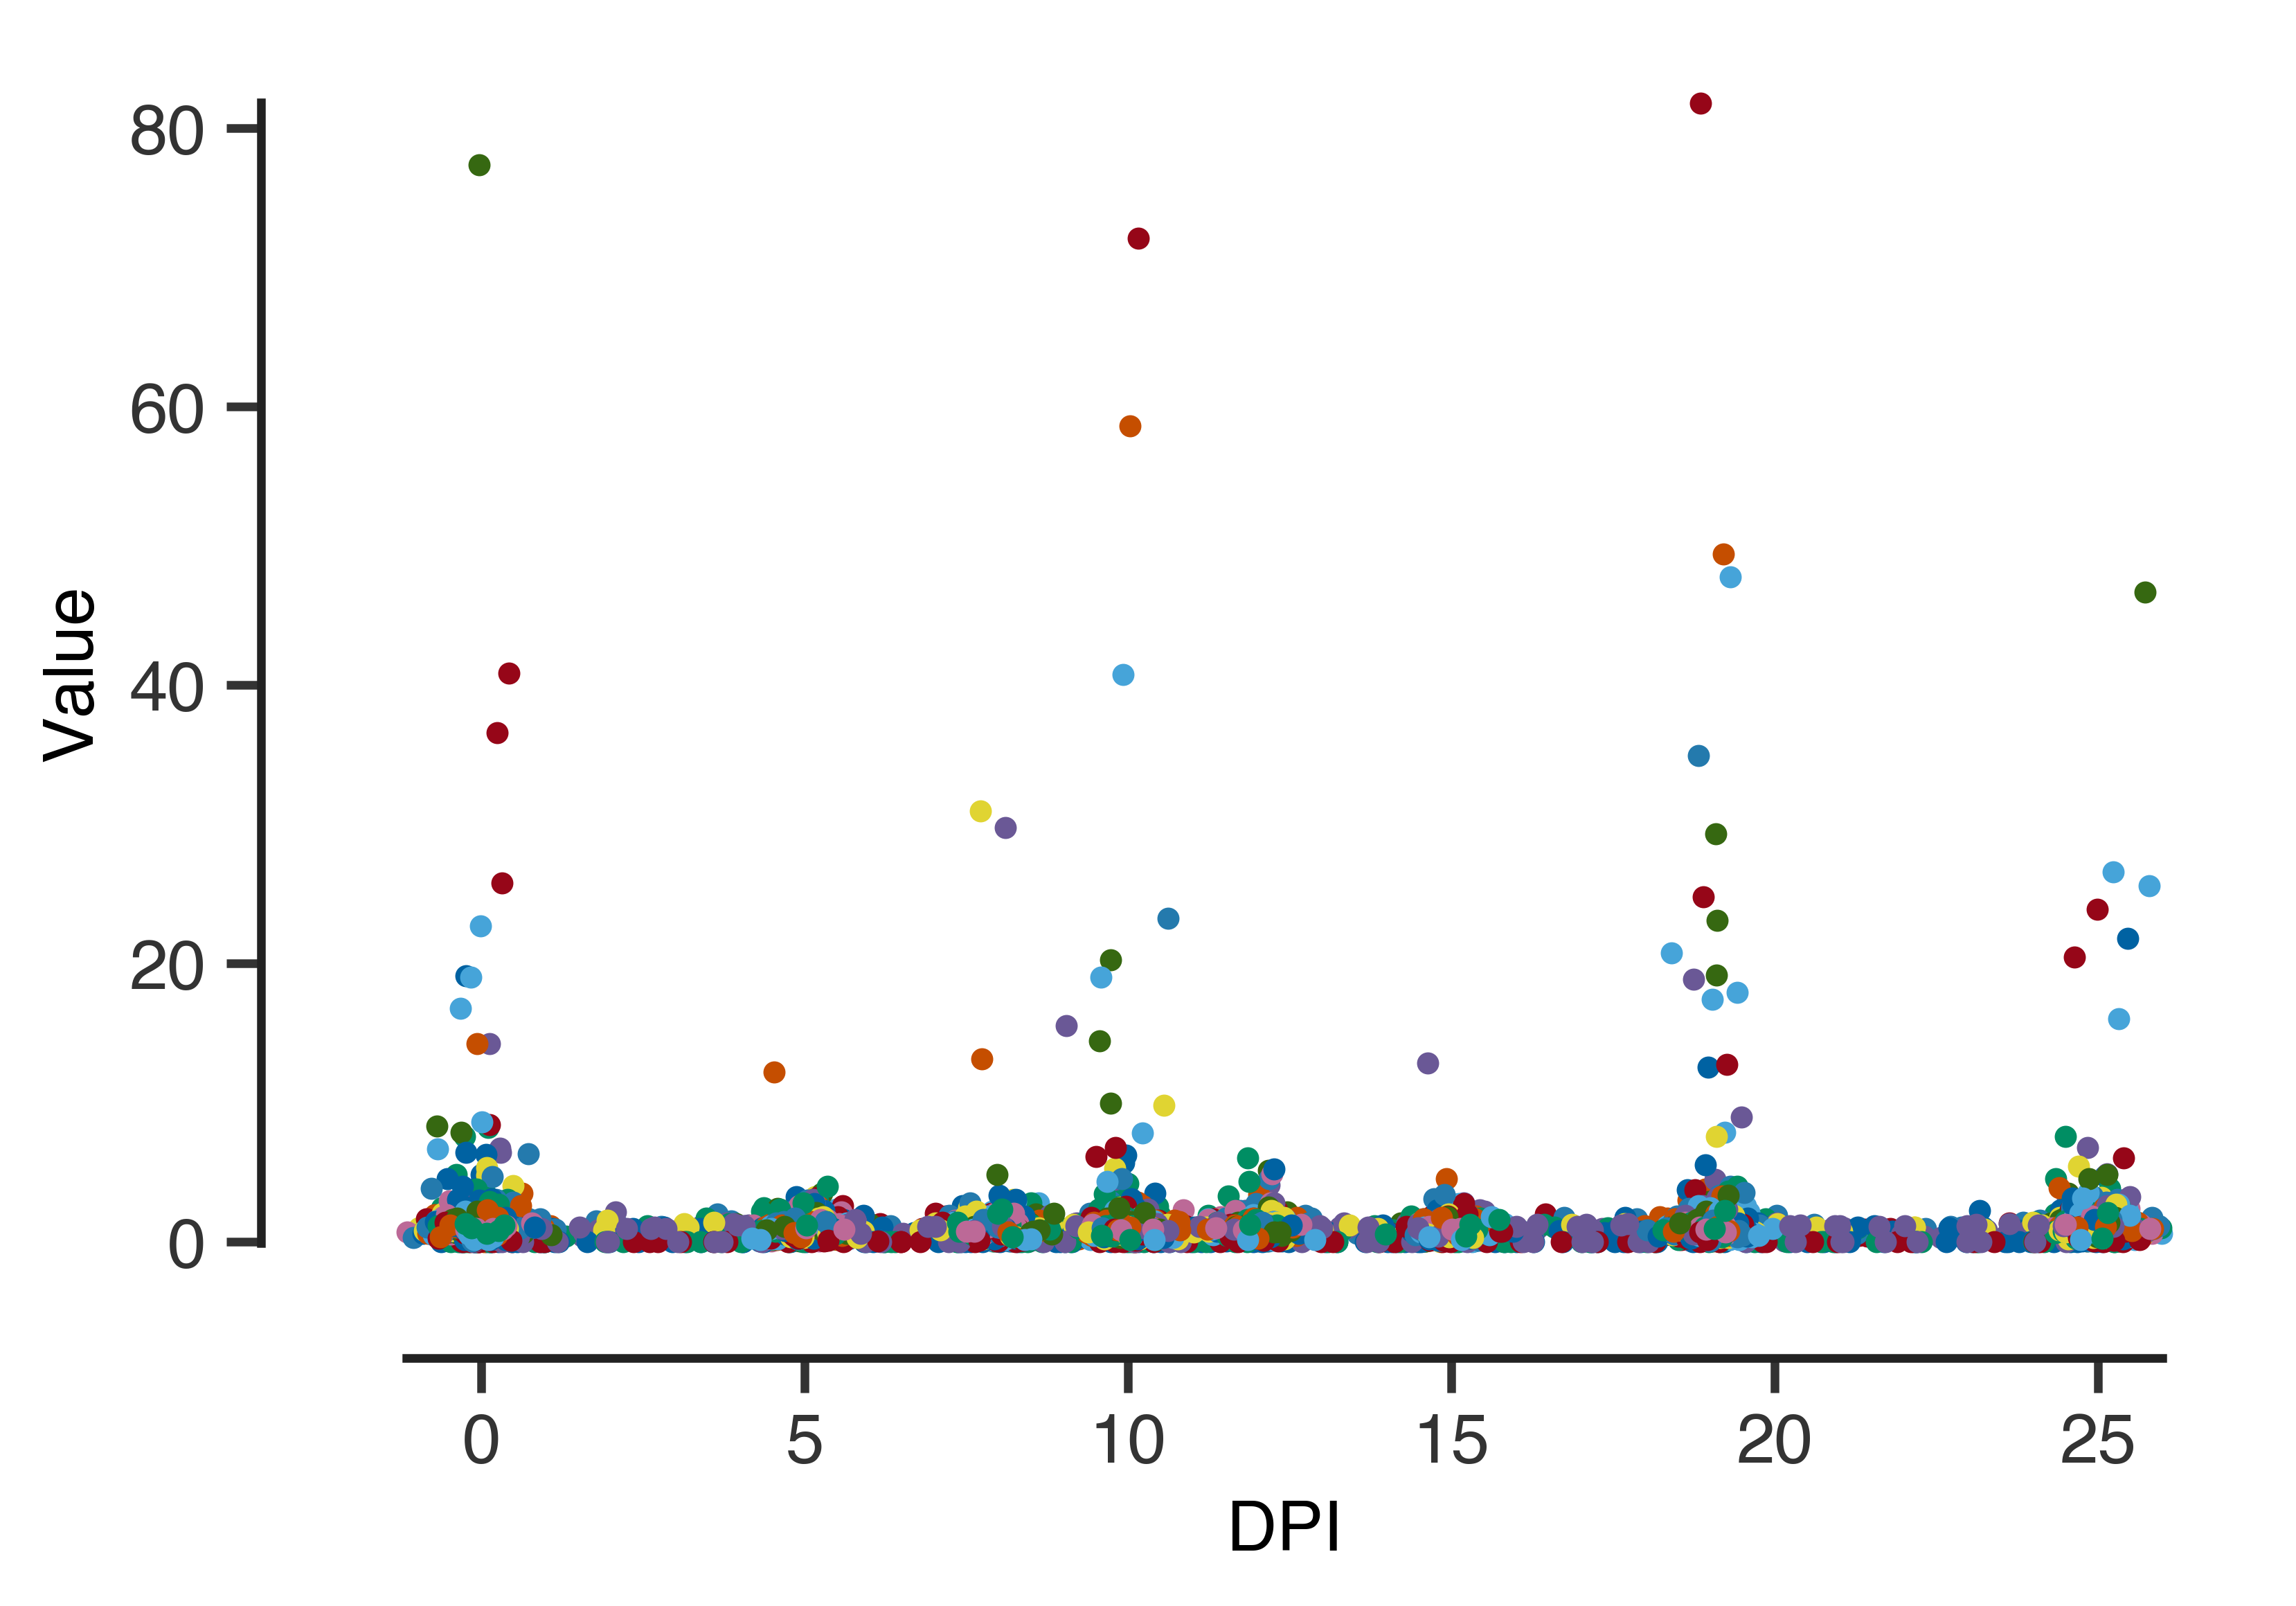

In [12]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(control_list[v])), control_list[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

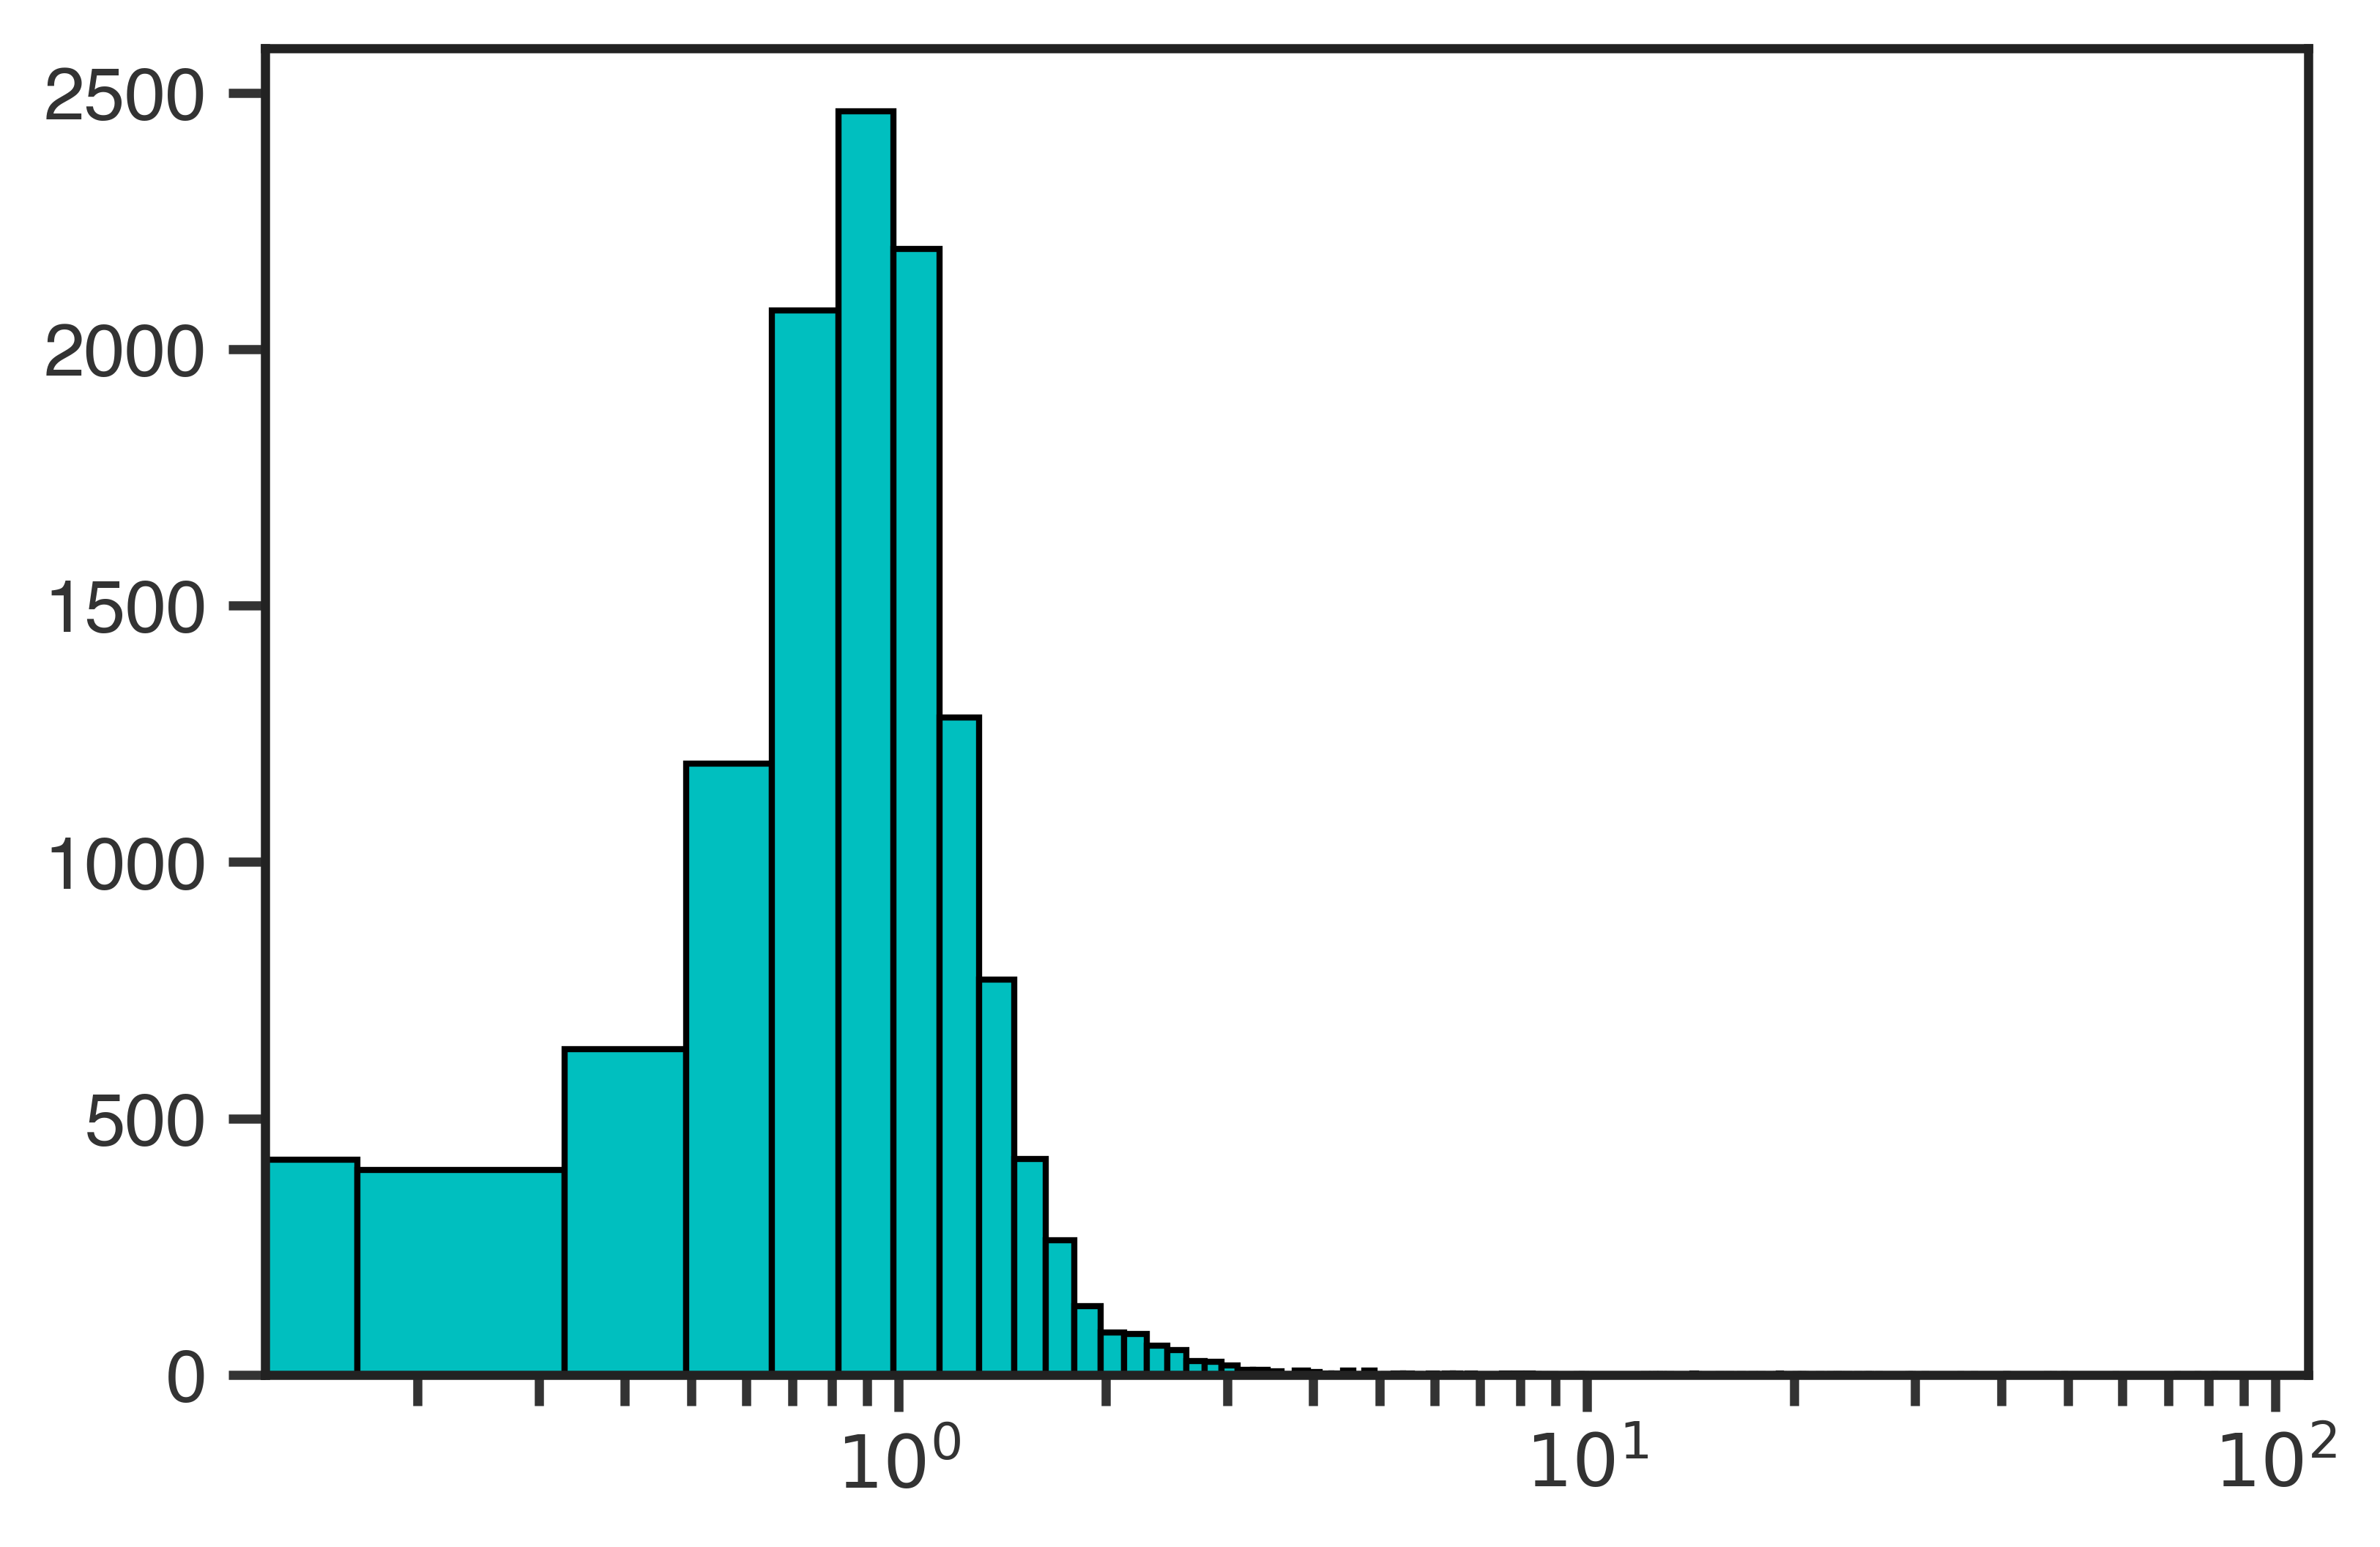

In [13]:
all_control_values = np.array([control_list[v] for v in variables]).flatten()
all_control_values = all_control_values[~np.isnan(all_control_values)]
count, bins = np.histogram(all_control_values, bins=500)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='c', edgecolor='k')
plt.xscale('log')

In [14]:
control_means = collections.defaultdict(list)
control_std = collections.defaultdict(list)
control_variance = collections.defaultdict(list)
for v in variables:
    control_means[v] = np.nanmean(control_list[v])
    control_std[v] = np.nanstd(control_list[v])
    control_variance[v] = np.nanvar(control_list[v])

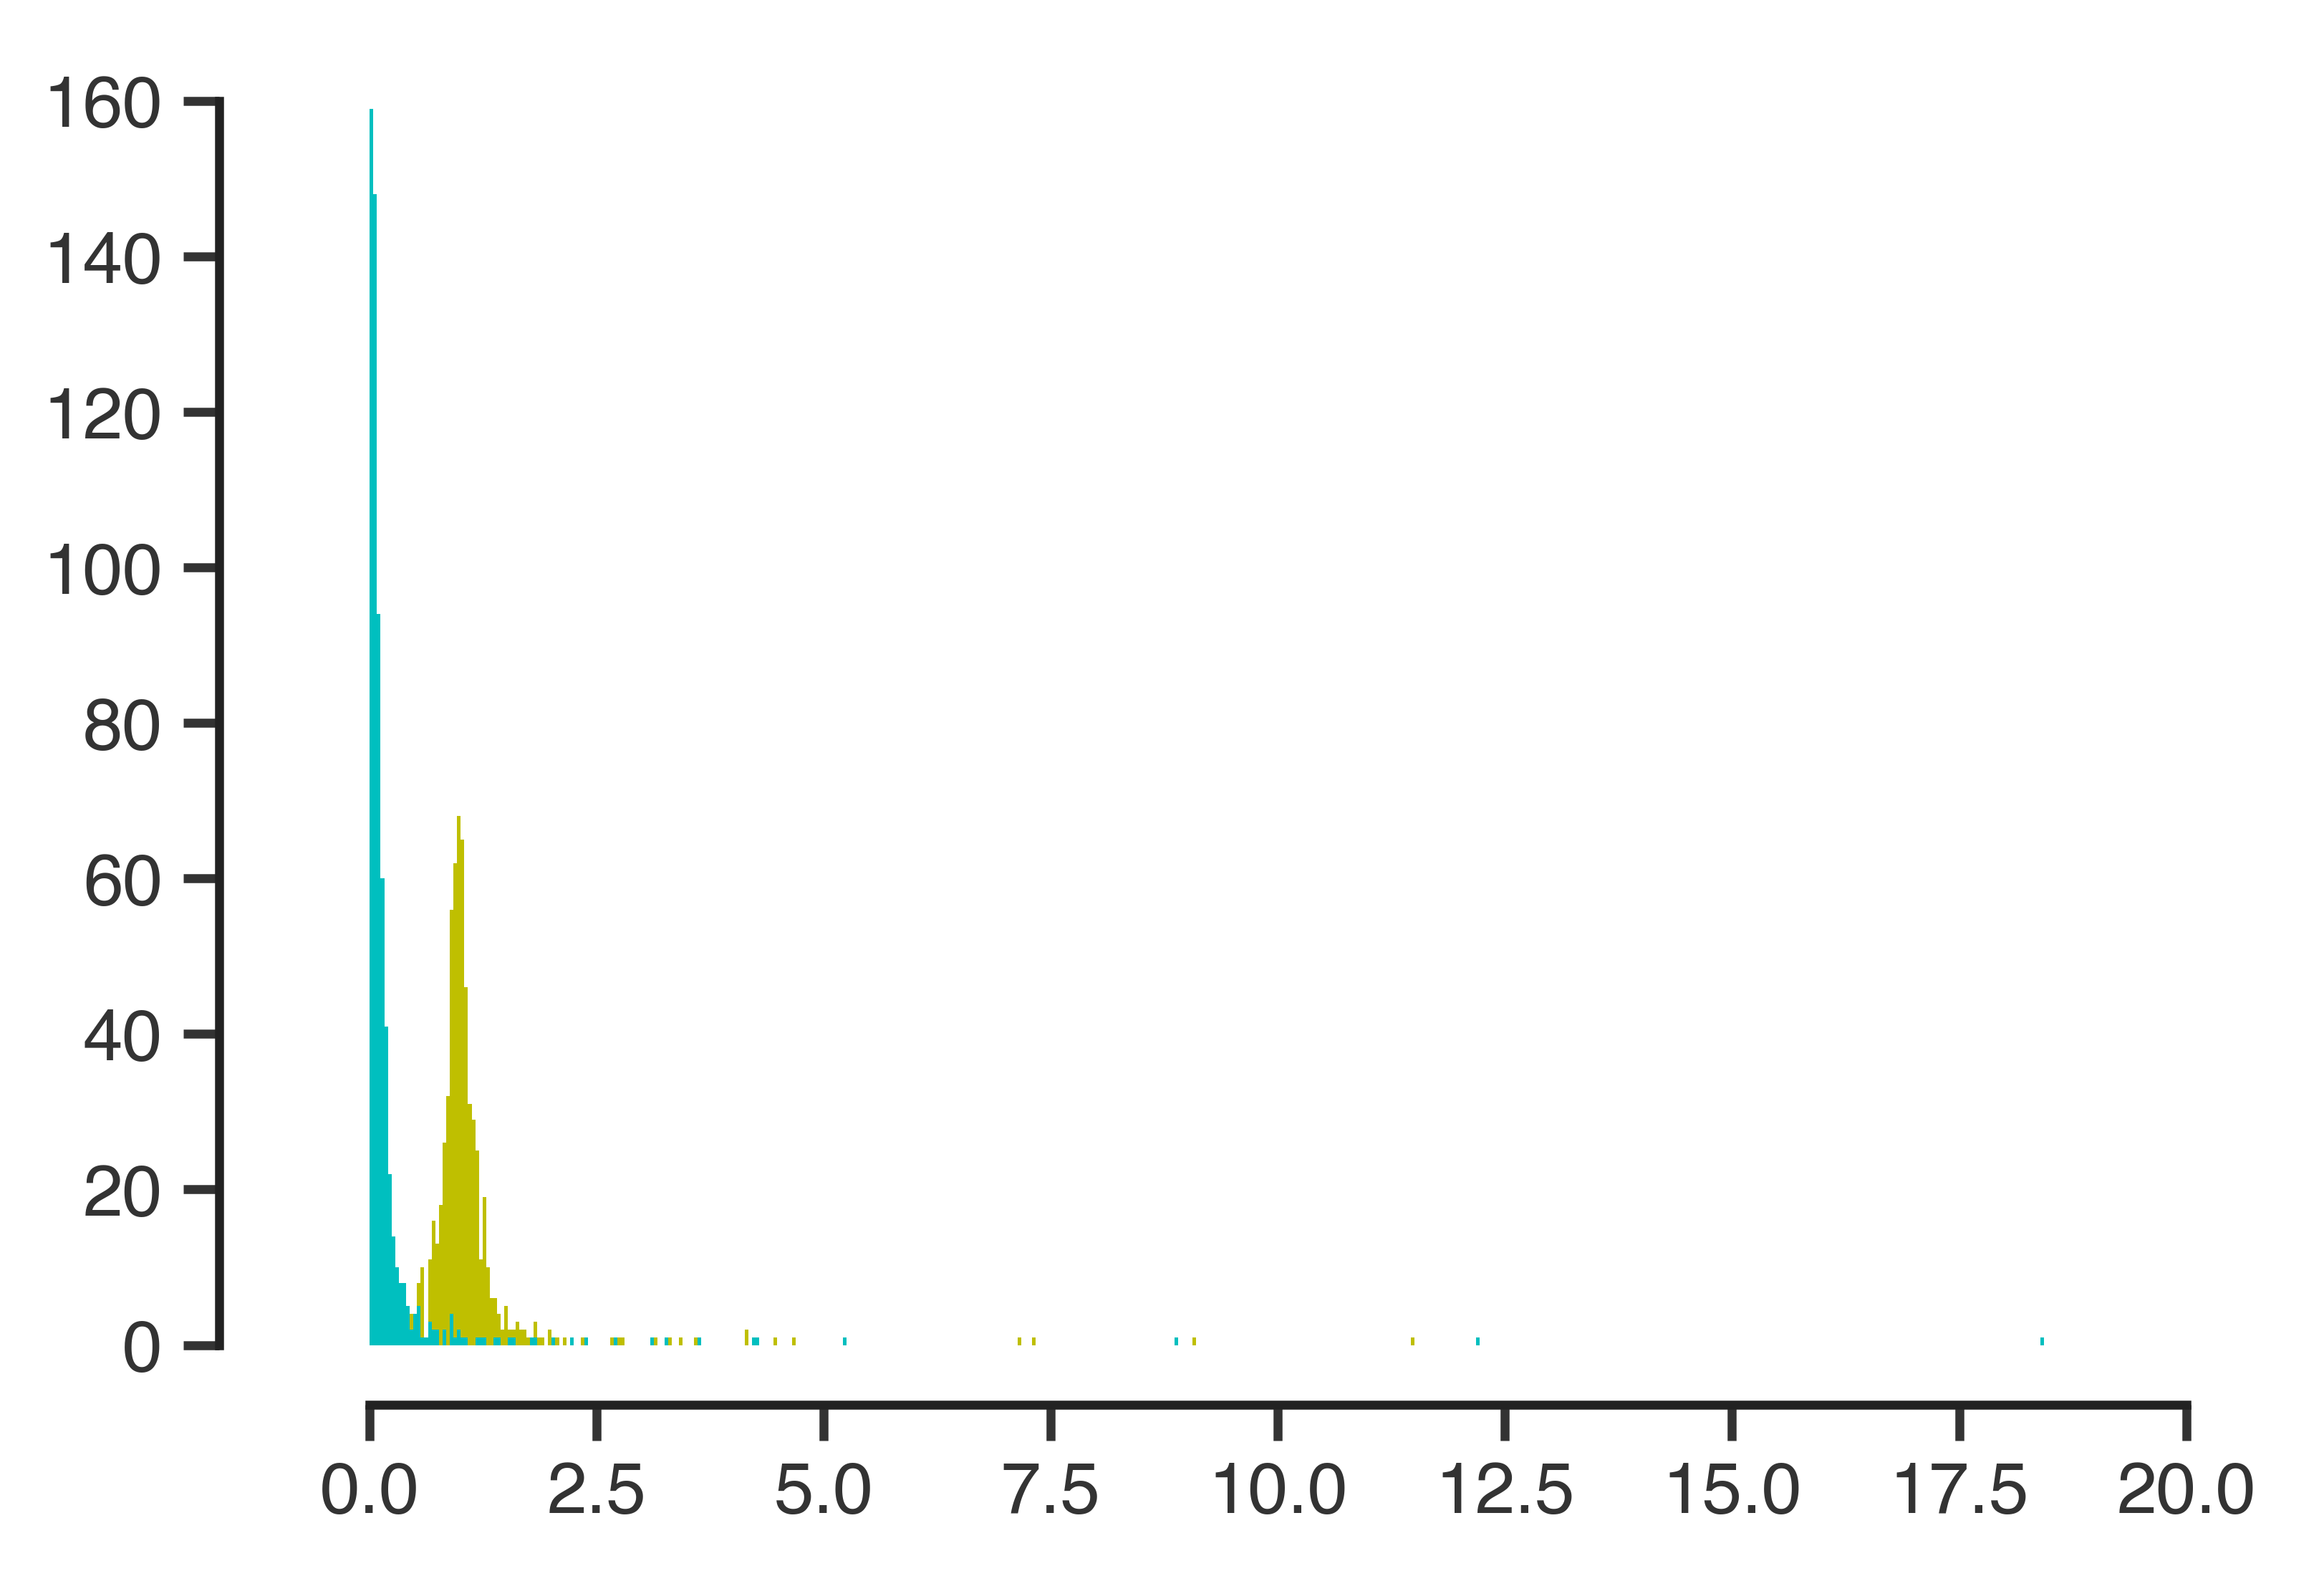

In [15]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,20,500)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

In [16]:
np.min(all_control_variances)

0.0

In [17]:
for v in variables:
    if control_variance[v] == 0.0:
        print(v)

cerotoylcarnitine (C26)*
lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)
Direct Bilirubin
GGT


### Modify variables to include variables that have zero variance

In [18]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
                                                        'Direct Bilirubin', 
                                                         'lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)',
                                                         'cerotoylcarnitine (C26)*', 'GGT']]

# Z-score these babies

In [19]:
from scipy.stats import zscore

In [20]:
normalized_control = collections.defaultdict(list)
for v in variables:
    normalized_control[v] = (control_list[v] - np.nanmean(control_list[v]))/np.nanstd(control_list[v])

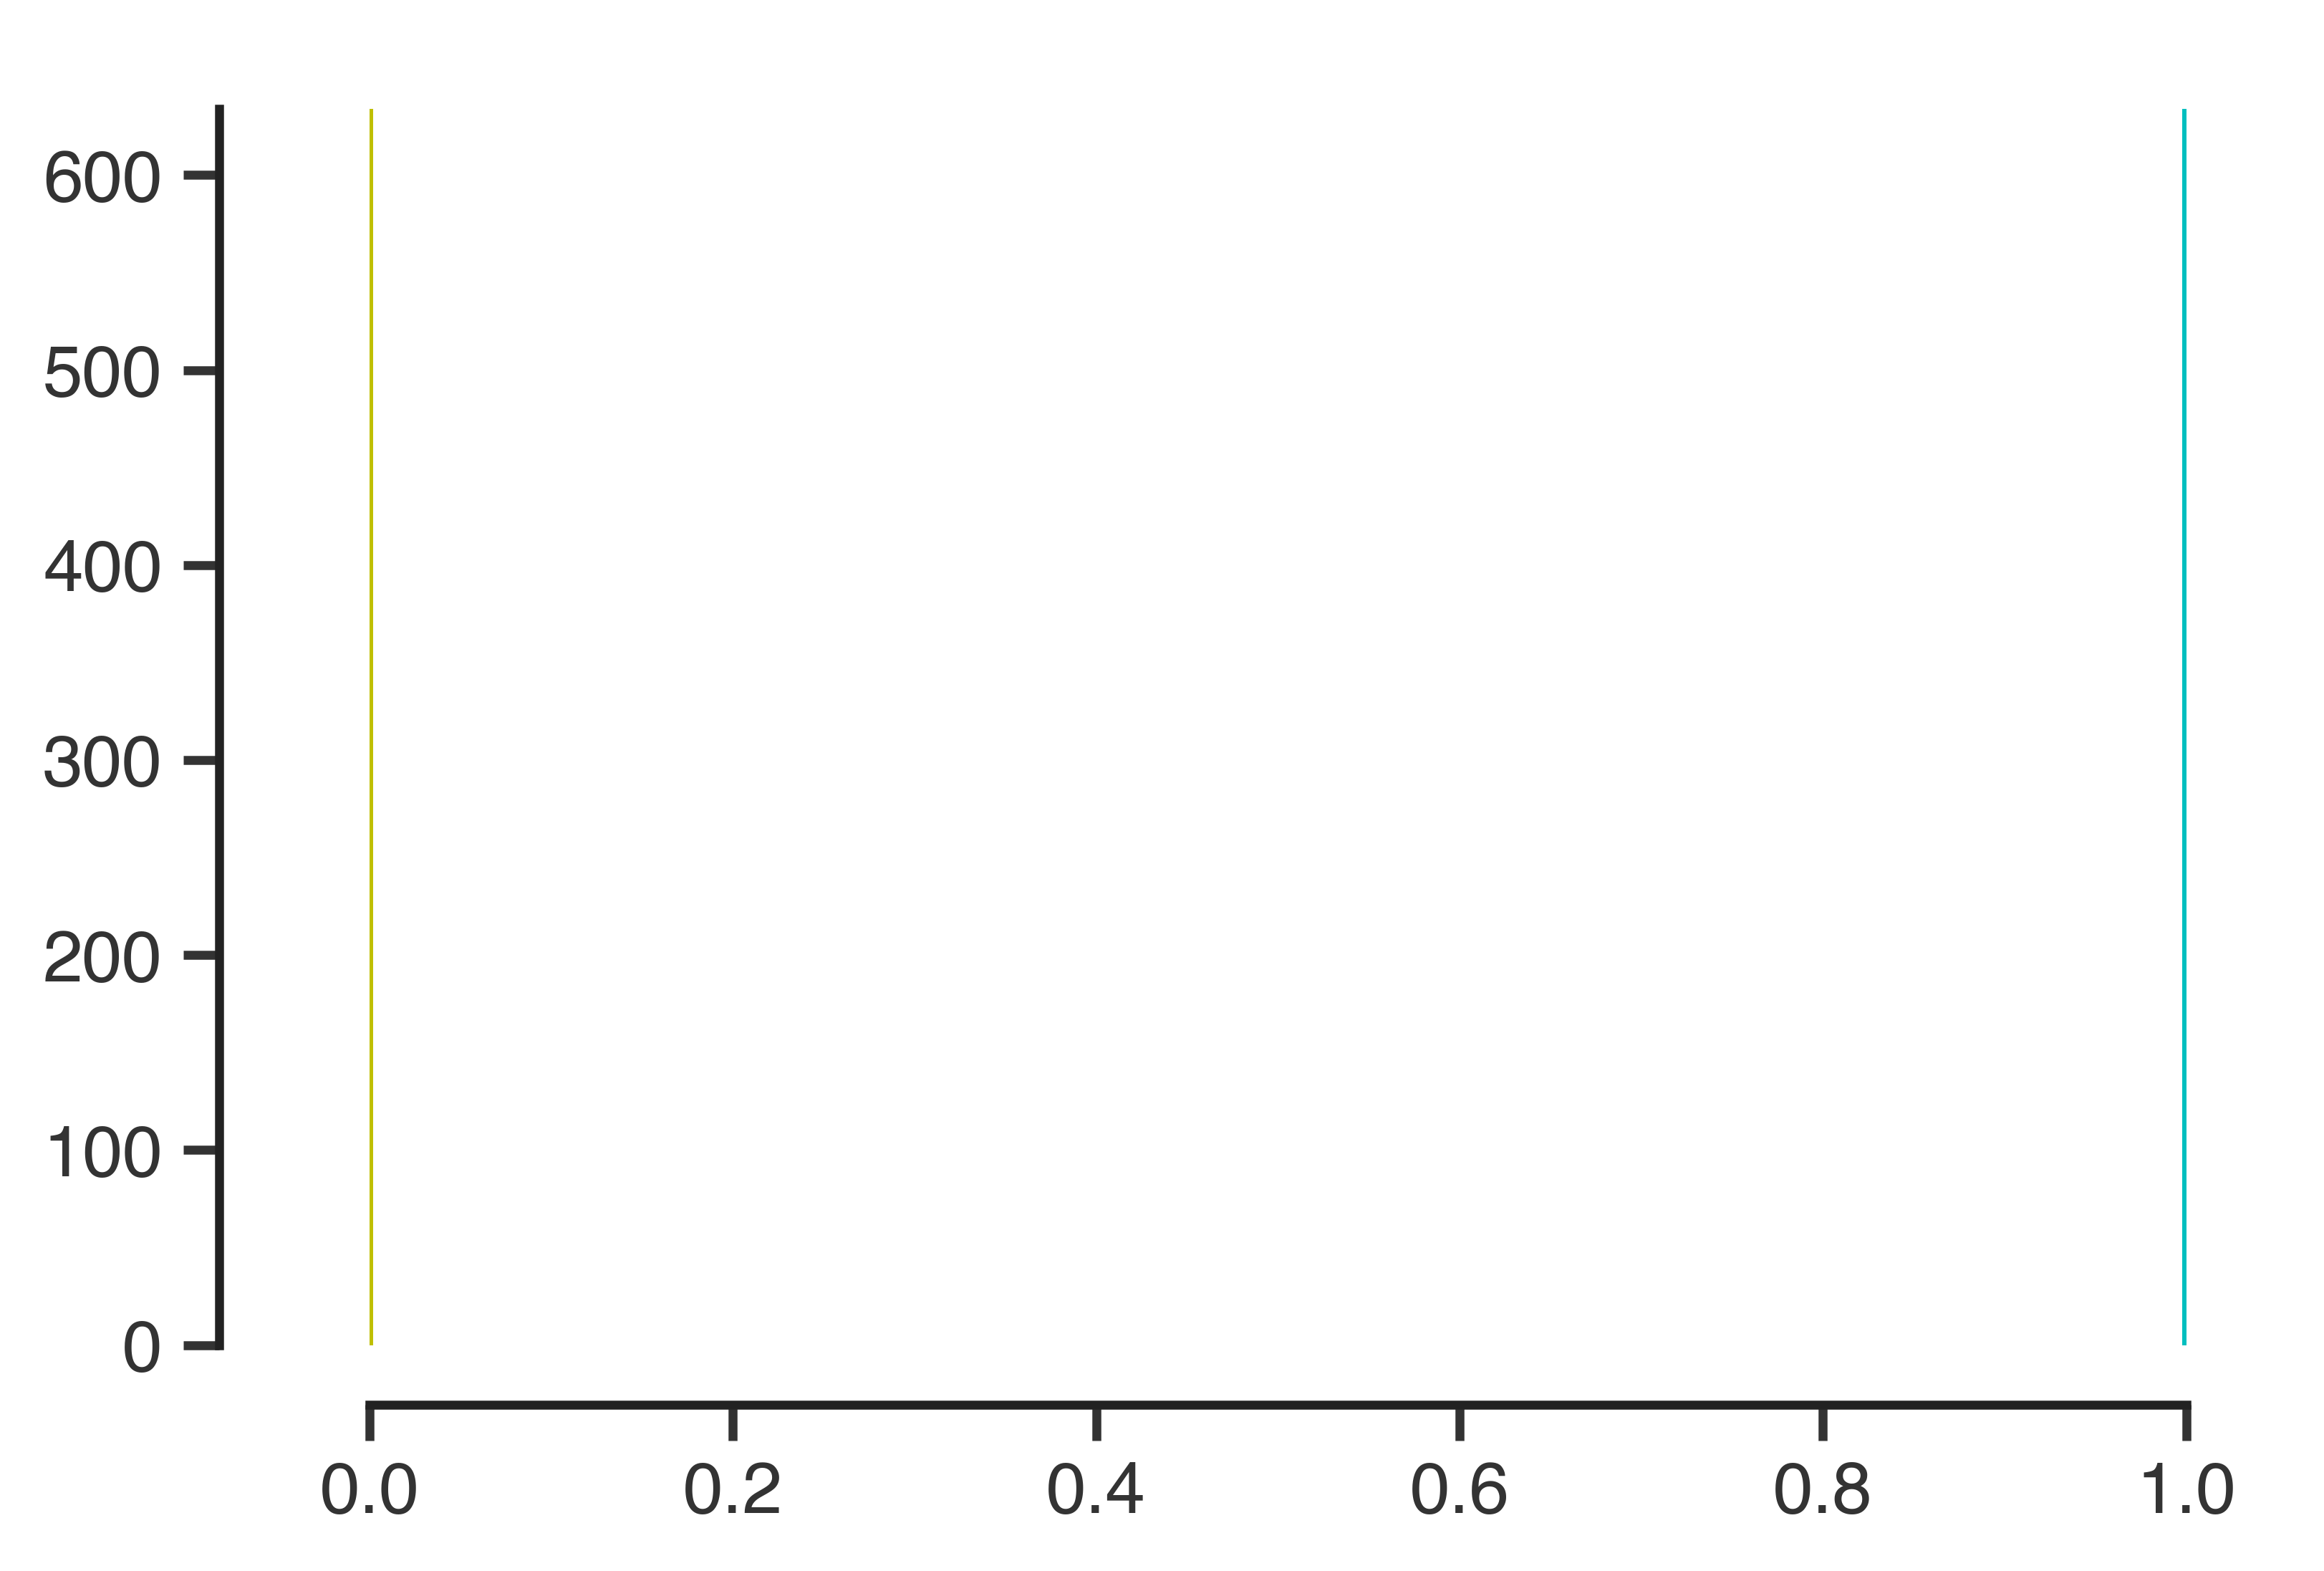

In [21]:
all_control_means = np.array([np.nanmean(normalized_control[v]) for v in variables]).flatten()
all_control_variances = np.array([np.nanvar(normalized_control[v]) for v in variables]).flatten()

bins = np.linspace(min([min(all_control_means), min(all_control_variances)]),
                   max([max(all_control_means), max(all_control_variances)]),500)

bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

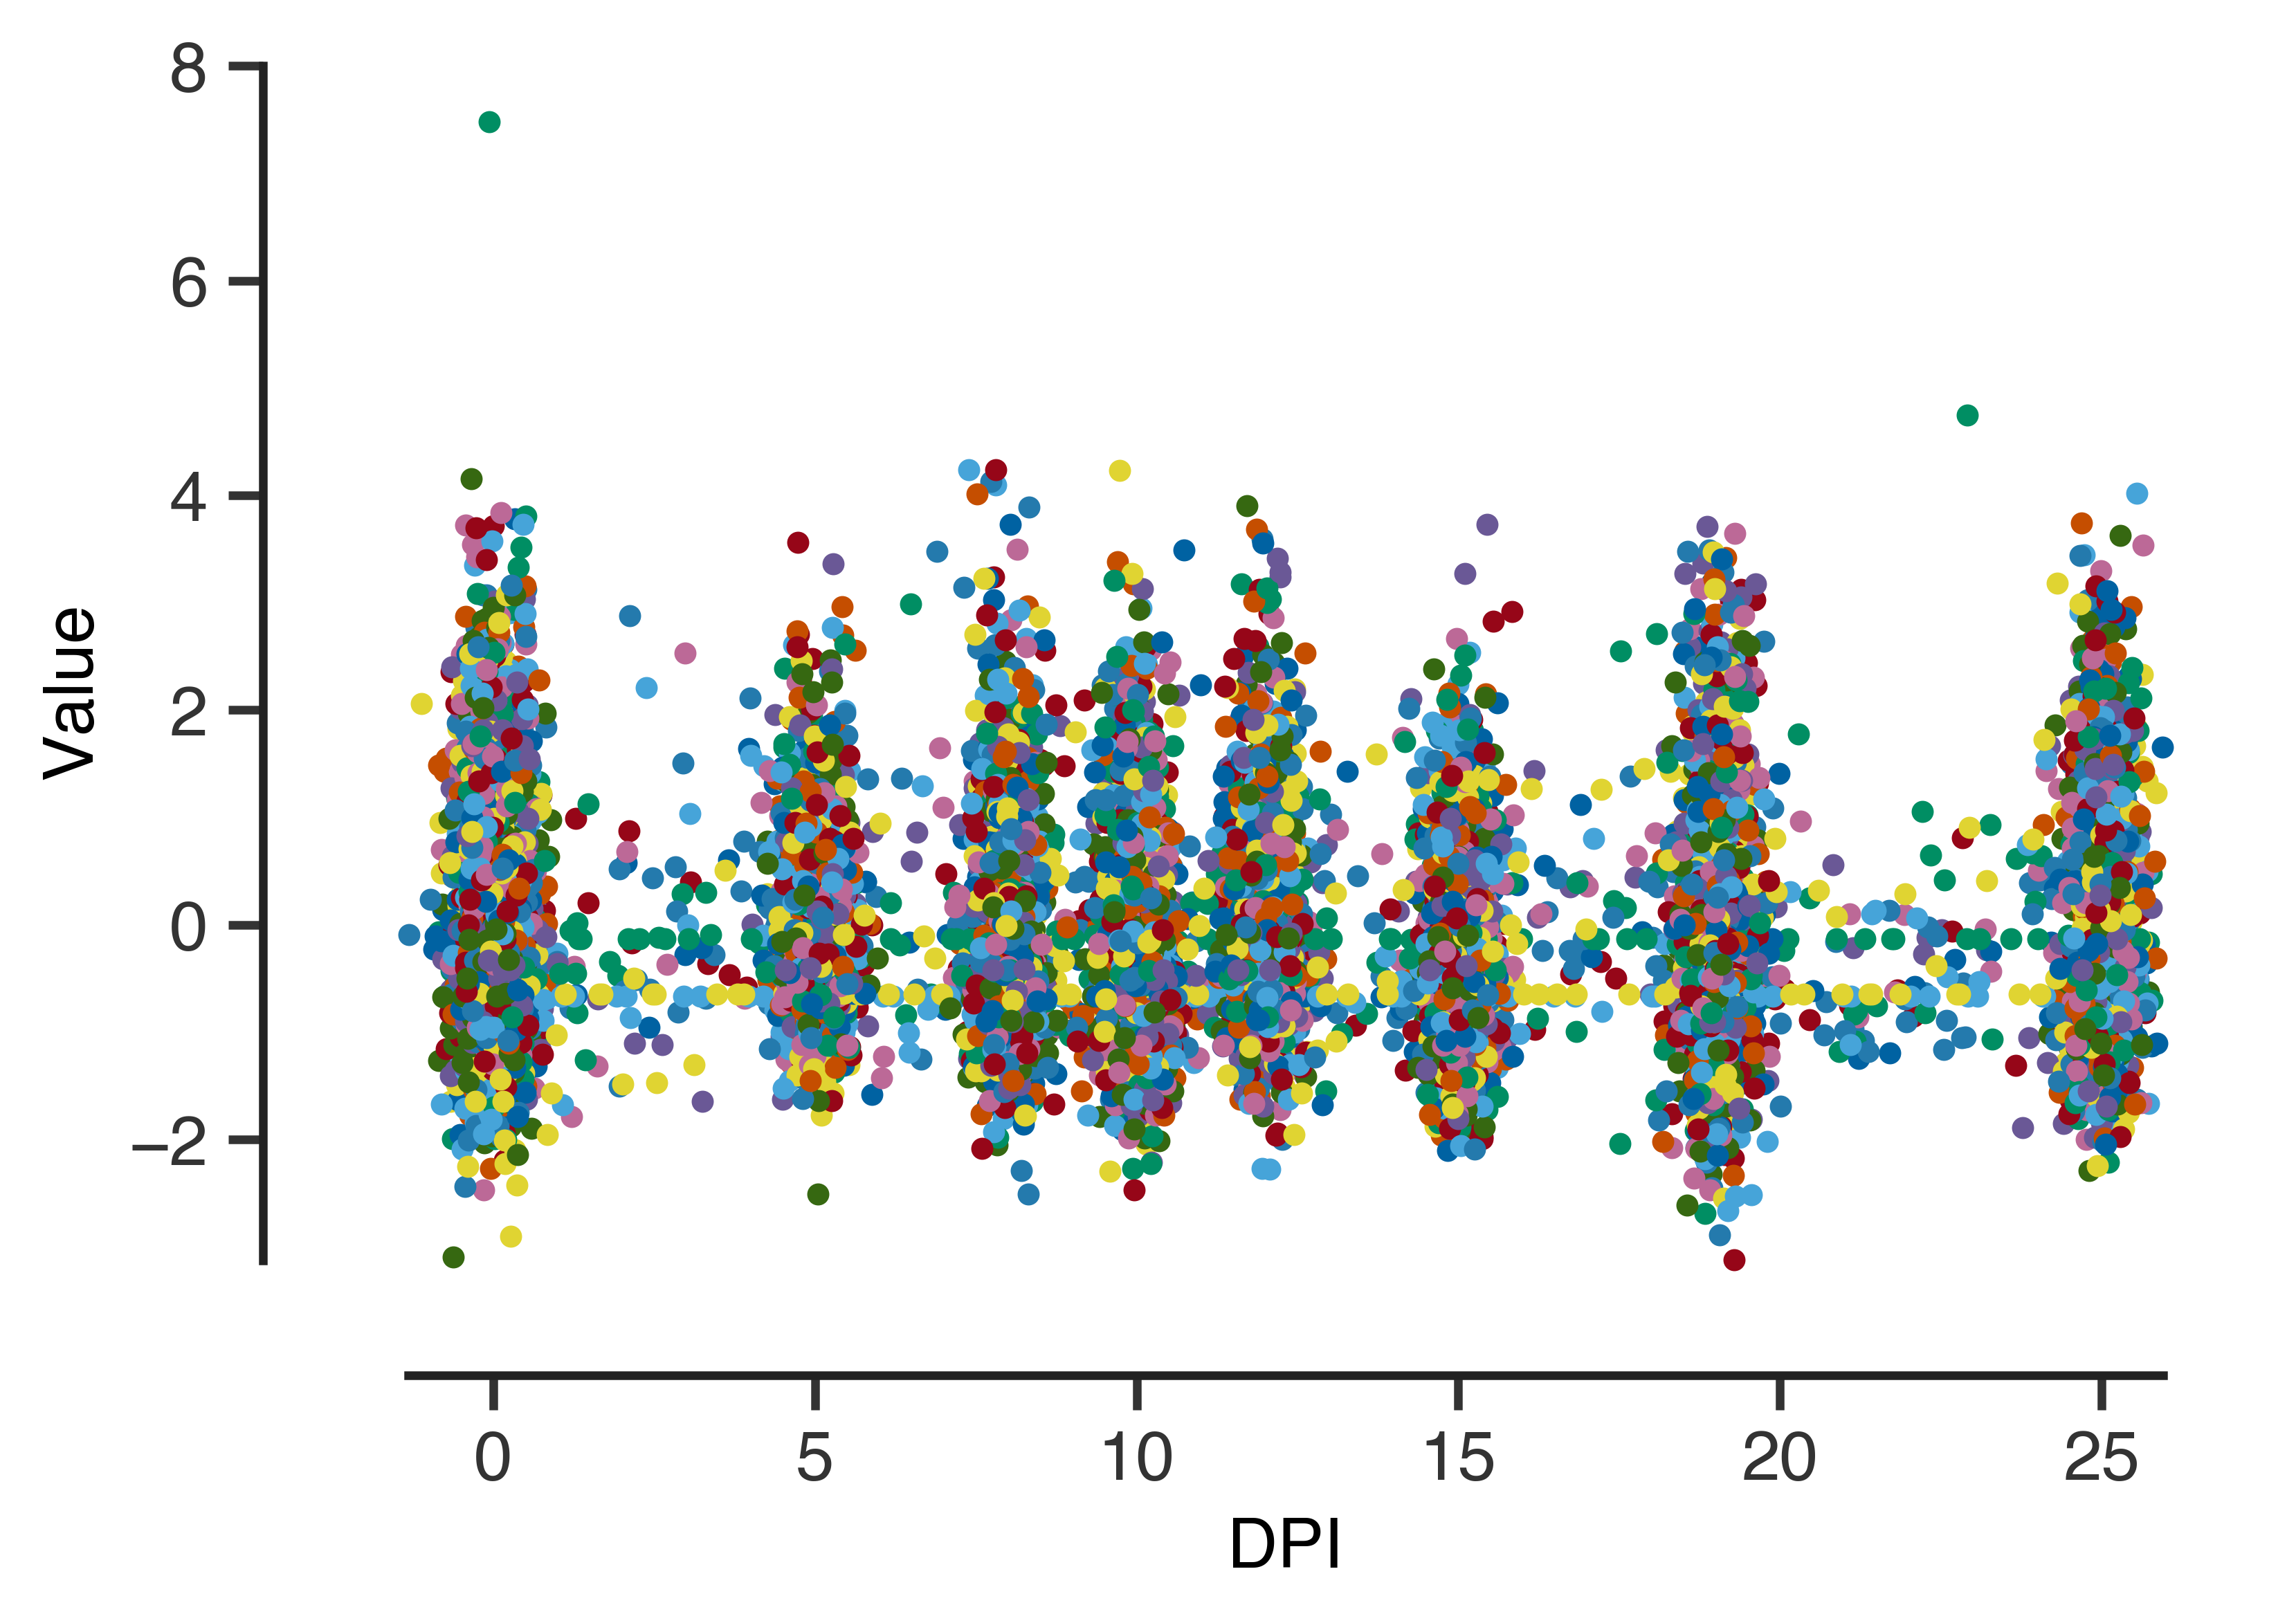

In [22]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(normalized_control[v])), normalized_control[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

# Load the experimental data!!!

In [23]:
experimental_file = open(data_path + experimental_name, 'r')
experimental_reader = csv.reader(experimental_file)

In [24]:
experimental_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(experimental_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    experimental_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    experimental_list[labels[idi]].append(float(l))
                elif idi == 0:
                    experimental_list[labels[idi]].append(l)

1.1
2.1
3.1
4.1
5.1
1.2
2.2
3.2
4.2
5.2
1.3
2.3
3.3
4.3
5.3
1.4
2.4
3.4
4.4
5.4
1.5
2.5
3.5
4.5
5.5
1.6
2.6
3.6
4.6
5.6
1.7
2.7
3.7
4.7
5.7
1.8
2.8
3.8
4.8
5.8
1.9
2.9
3.9
4.9
5.9
1.10
2.10
3.10
4.10
5.10
1.11
2.11
3.11
4.11
5.11
1.12
2.12
3.12
4.12
5.12
1.13
2.13
3.13
4.13
5.13
1.14
2.14
3.14
4.14
5.14
1.15
2.15
3.15
4.15
5.15
1.16
2.16
3.16
4.16
5.16
1.17
2.17
3.17
4.17
5.17
1.18
2.18
3.18
4.18
5.18
1.19
2.19
3.19
4.19
5.19
1.20
2.20
3.20
4.20
5.20
1.21
2.21
3.21
4.21
5.21
1.22
2.22
3.22
4.22
5.22
1.23
2.23
3.23
4.23
5.23
1.24
2.24
3.24
4.24
5.24
1.25
2.25
3.25
4.25
5.25


In [25]:
for m in experimental_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    experimental_list['mouse_id'] = this_split[0]

In [26]:
experimental_means = collections.defaultdict(list)
experimental_variance = collections.defaultdict(list)
for v in variables:
    experimental_means[v] = np.nanmean(experimental_list[v])
    experimental_variance[v] = np.nanvar(experimental_list[v])

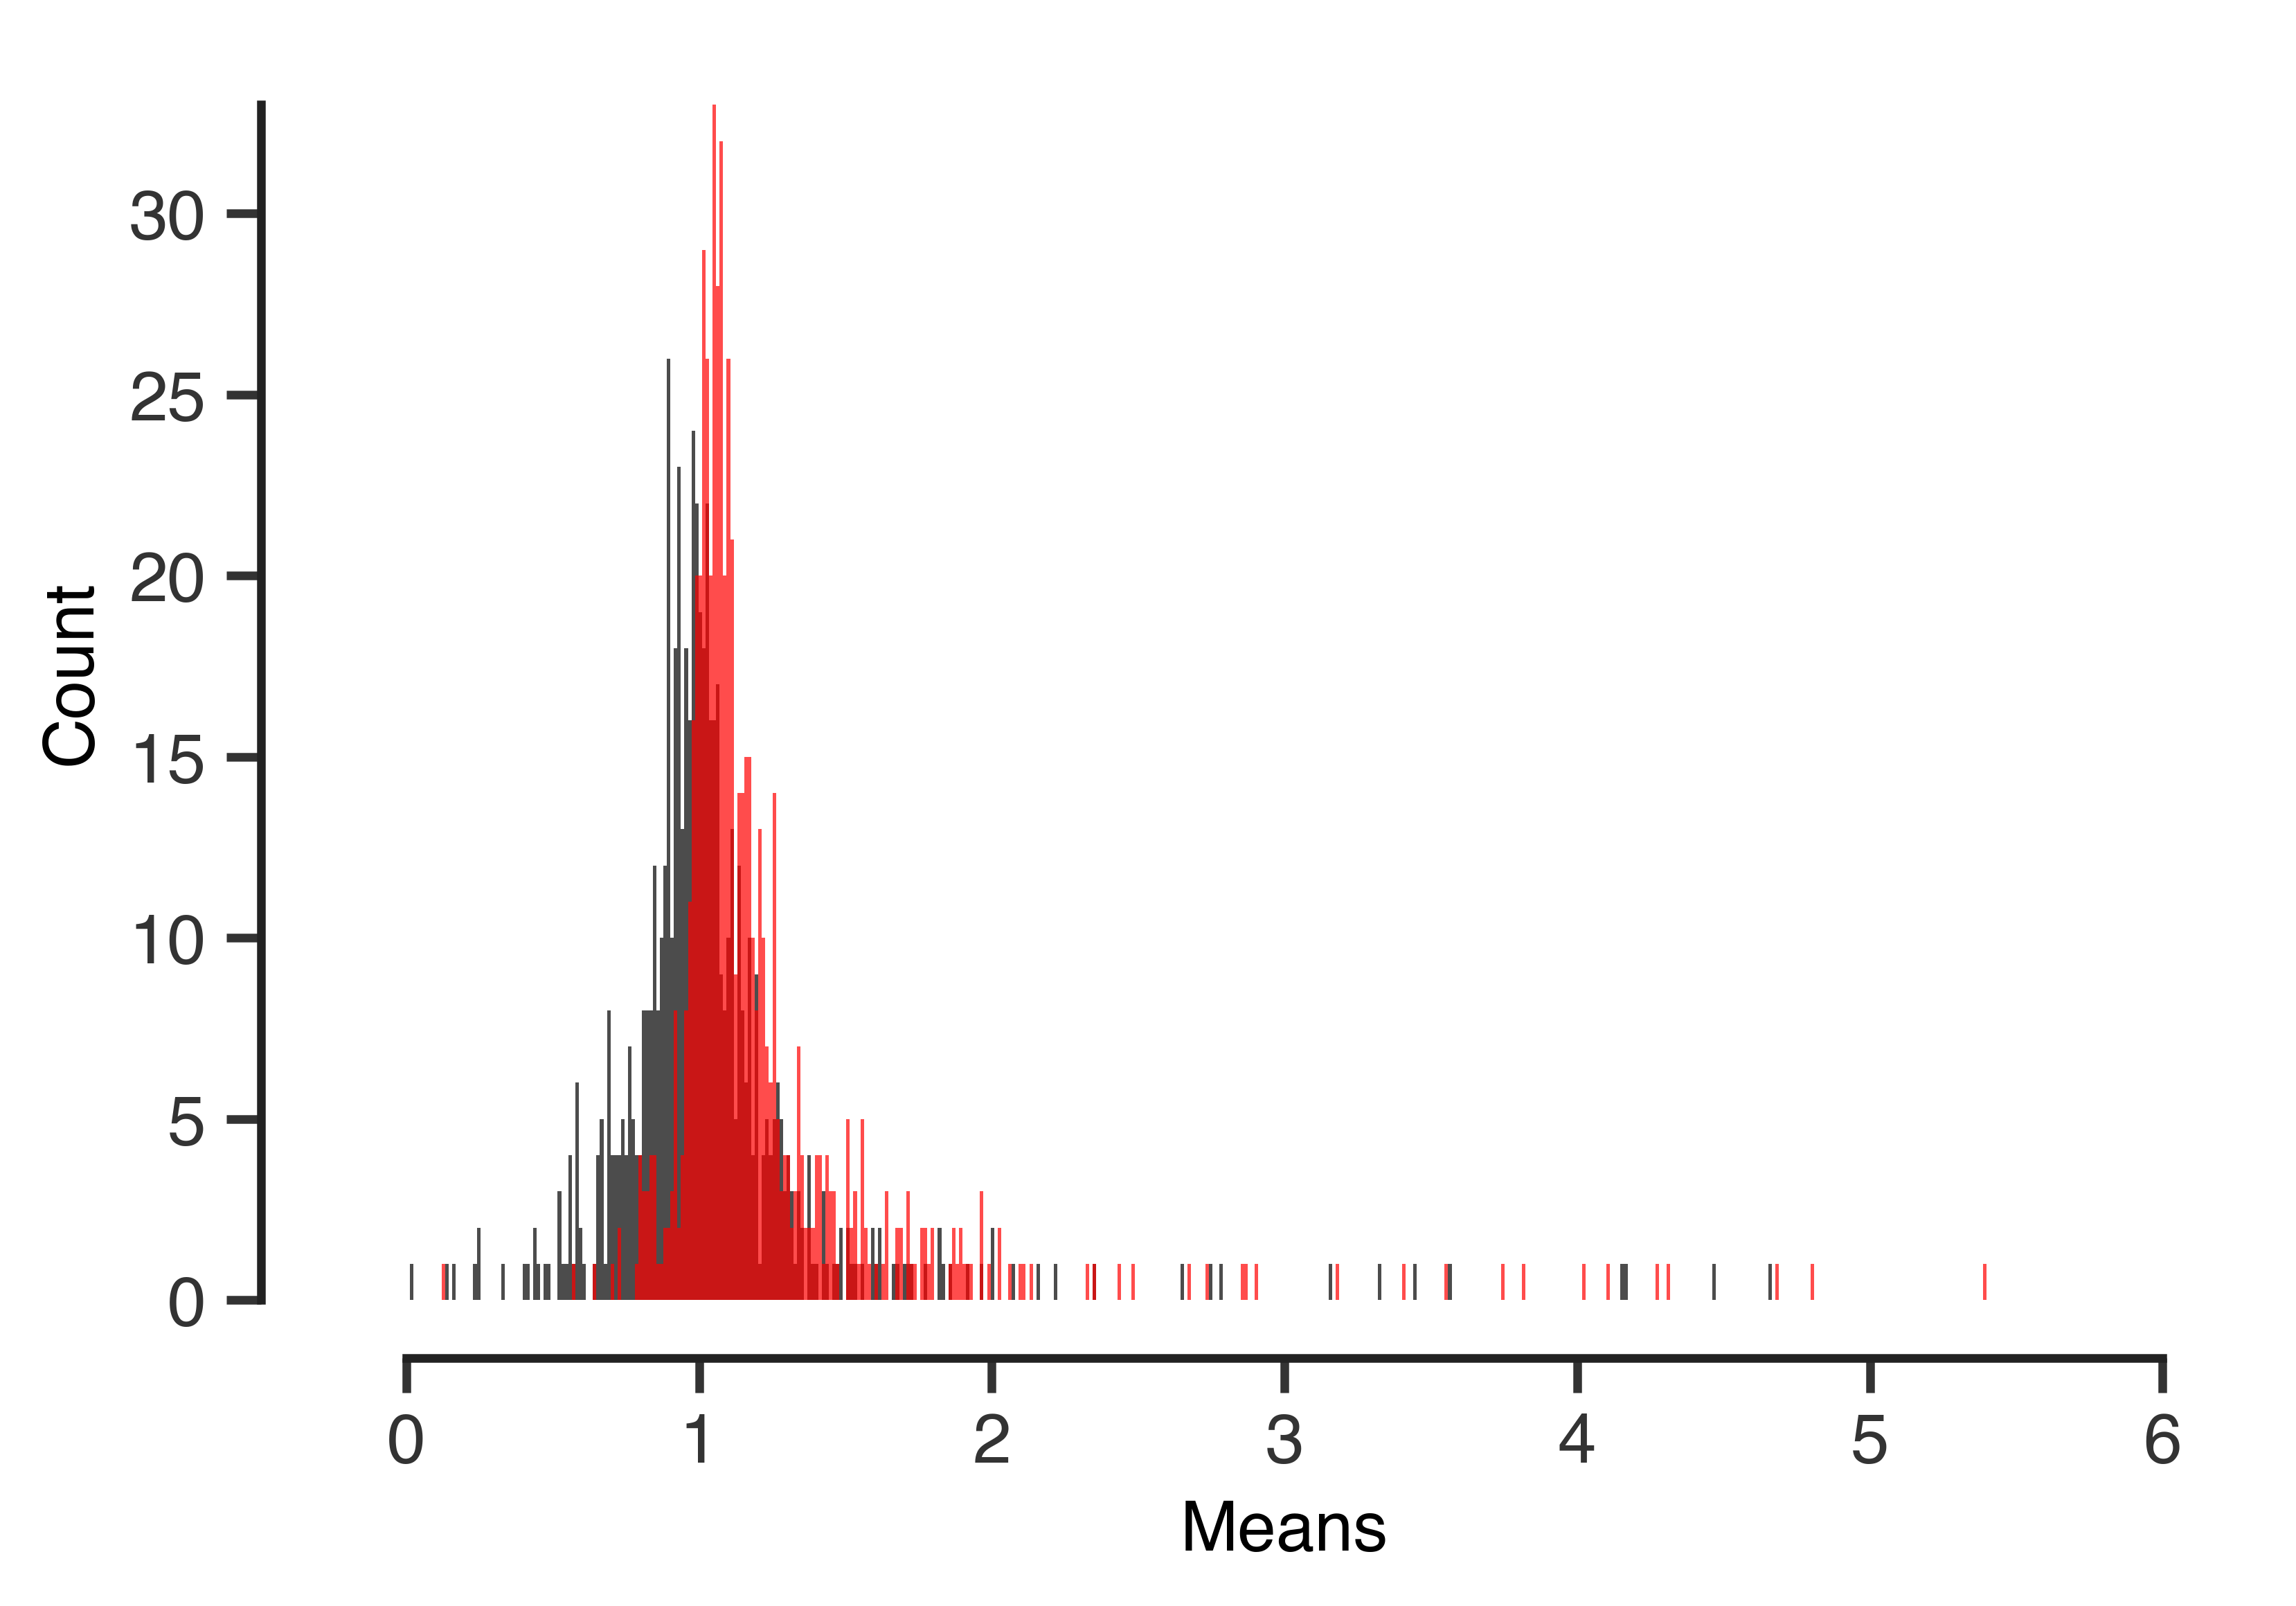

In [27]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_experimental_means = np.array([experimental_means[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,6,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_means, bins=bins)
count_experimental, bins = np.histogram(all_experimental_means, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Means')
plt.ylabel('Count')

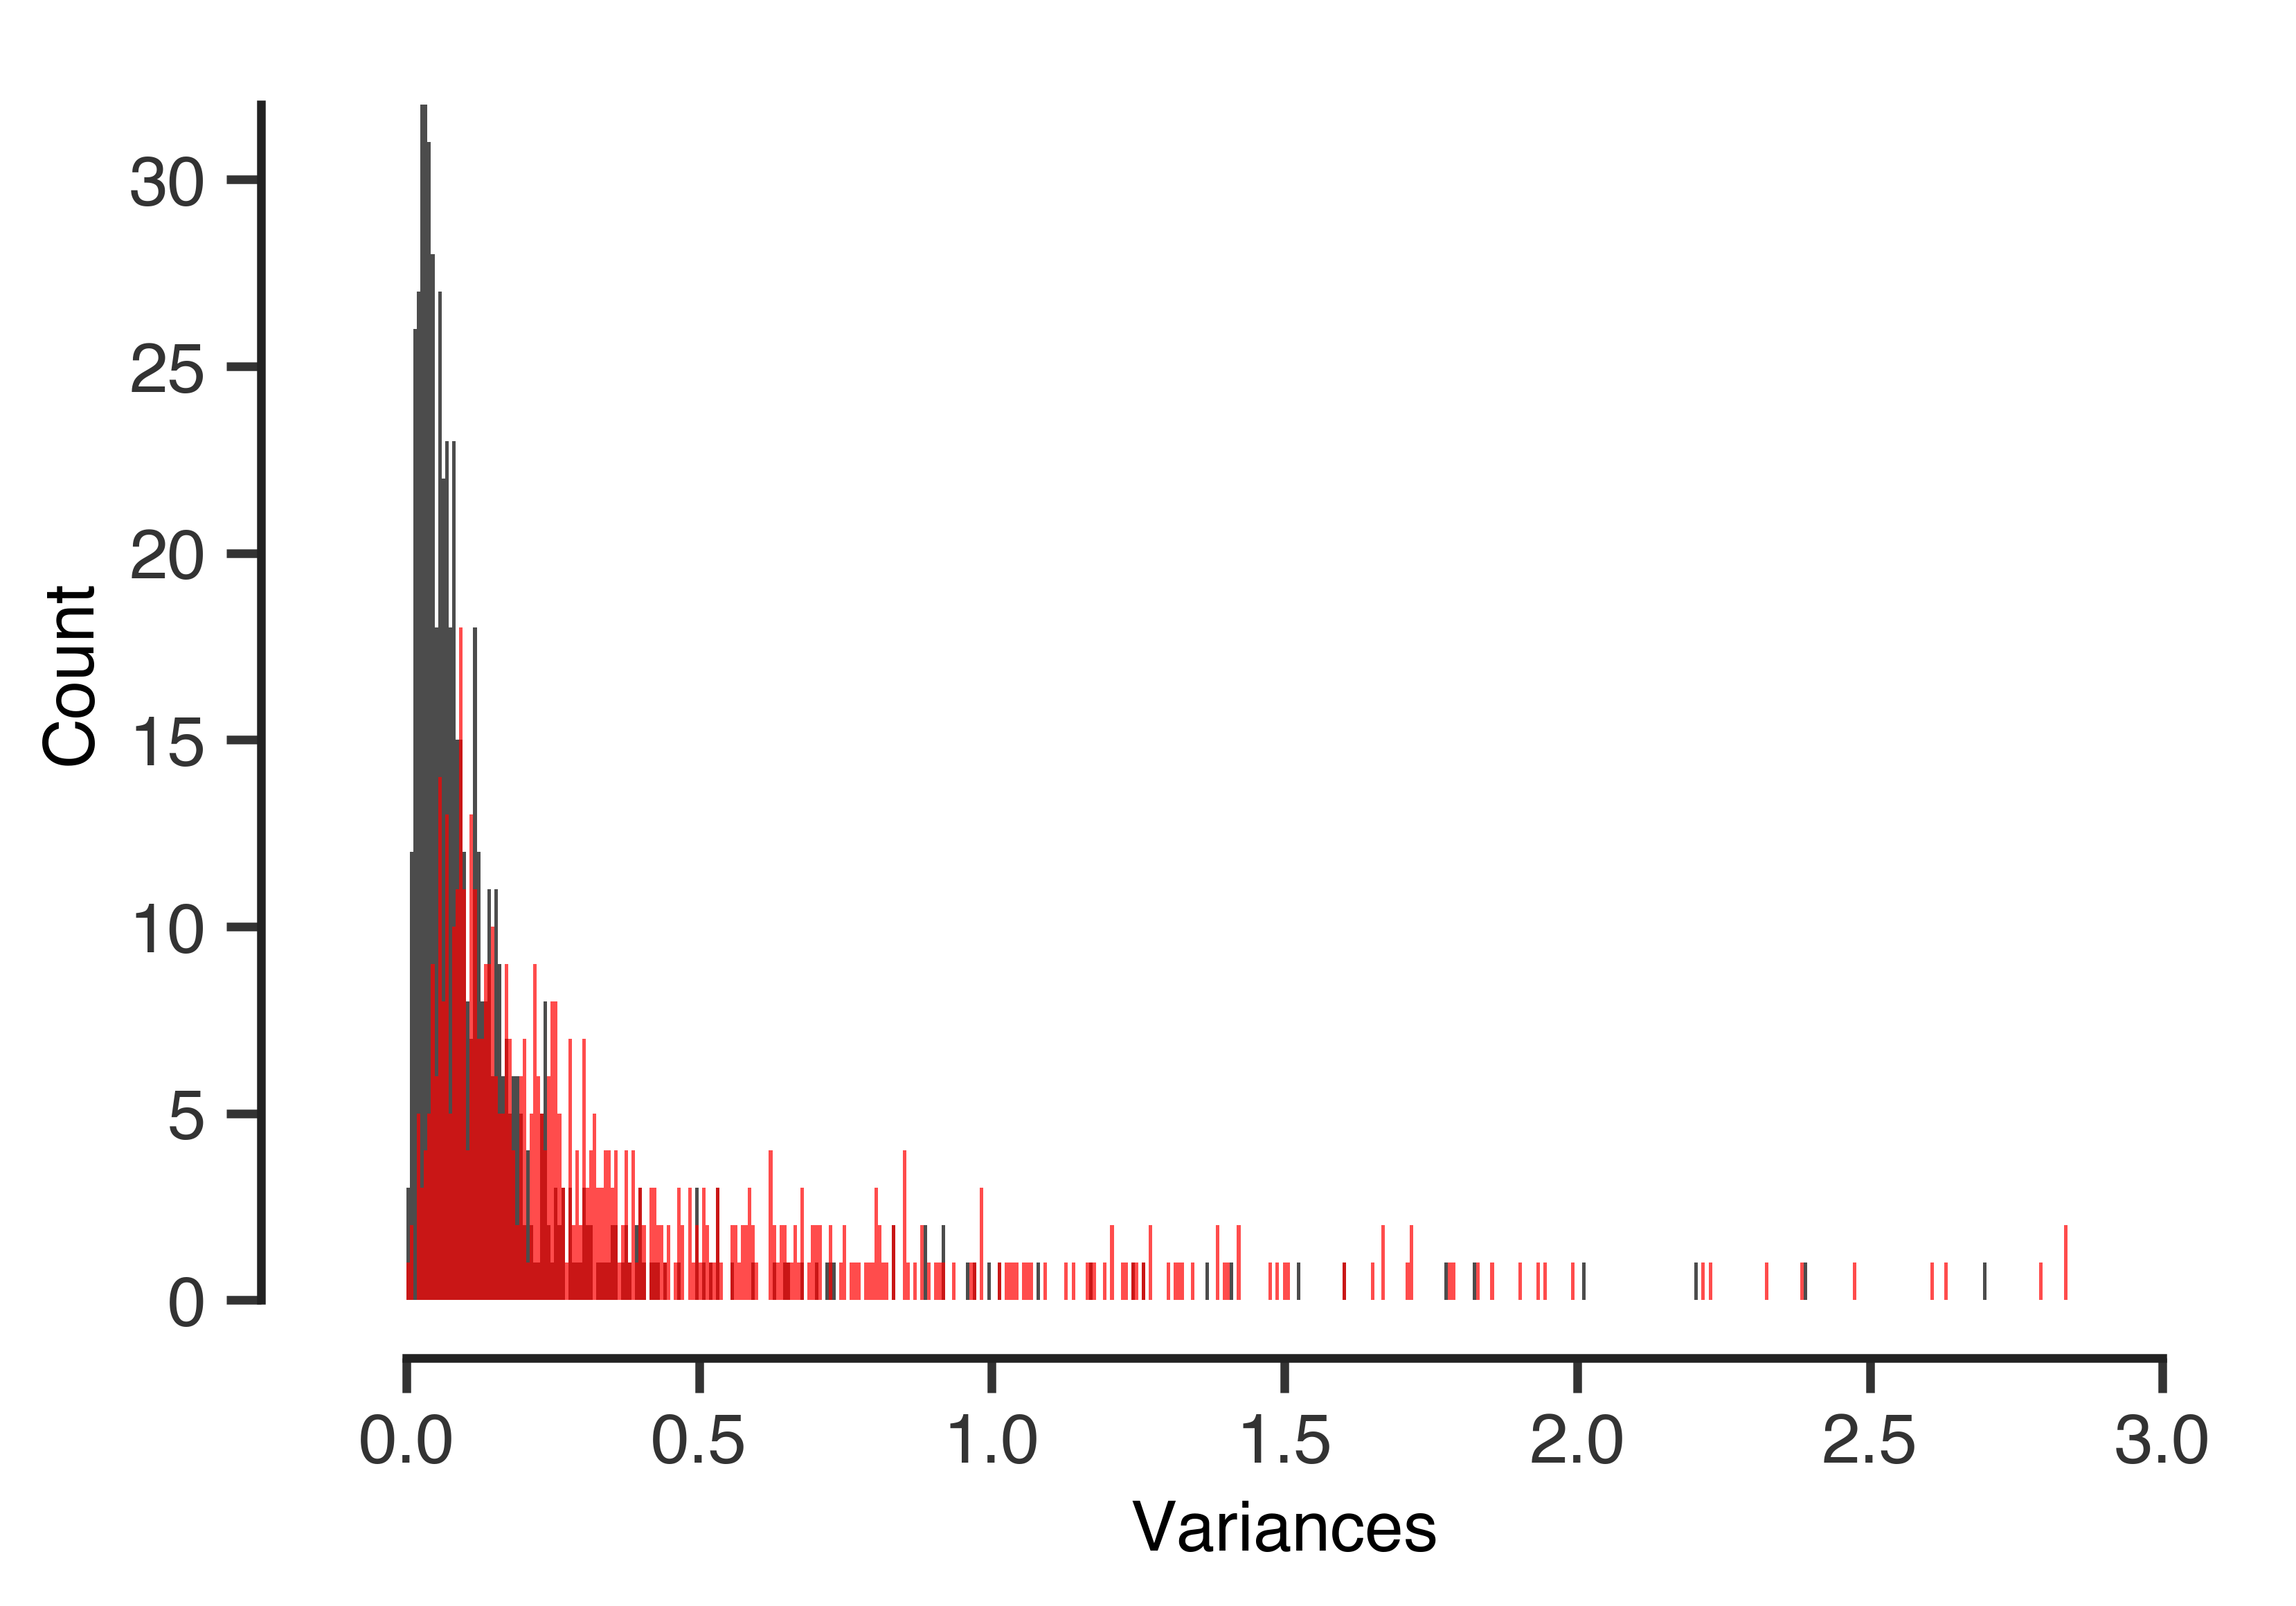

In [28]:
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()
all_experimental_variances = np.array([experimental_variance[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,3,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_variances, bins=bins)
count_experimental, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Variances')
plt.ylabel('Count')

#### So far so good!

Zscore now the experimental data

In [29]:
normalized_experimental = collections.defaultdict(list)
for v in variables:
    normalized_experimental[v] = (experimental_list[v] - control_means[v])/control_std[v]

In [30]:
time_experimental = experimental_list['DPI']

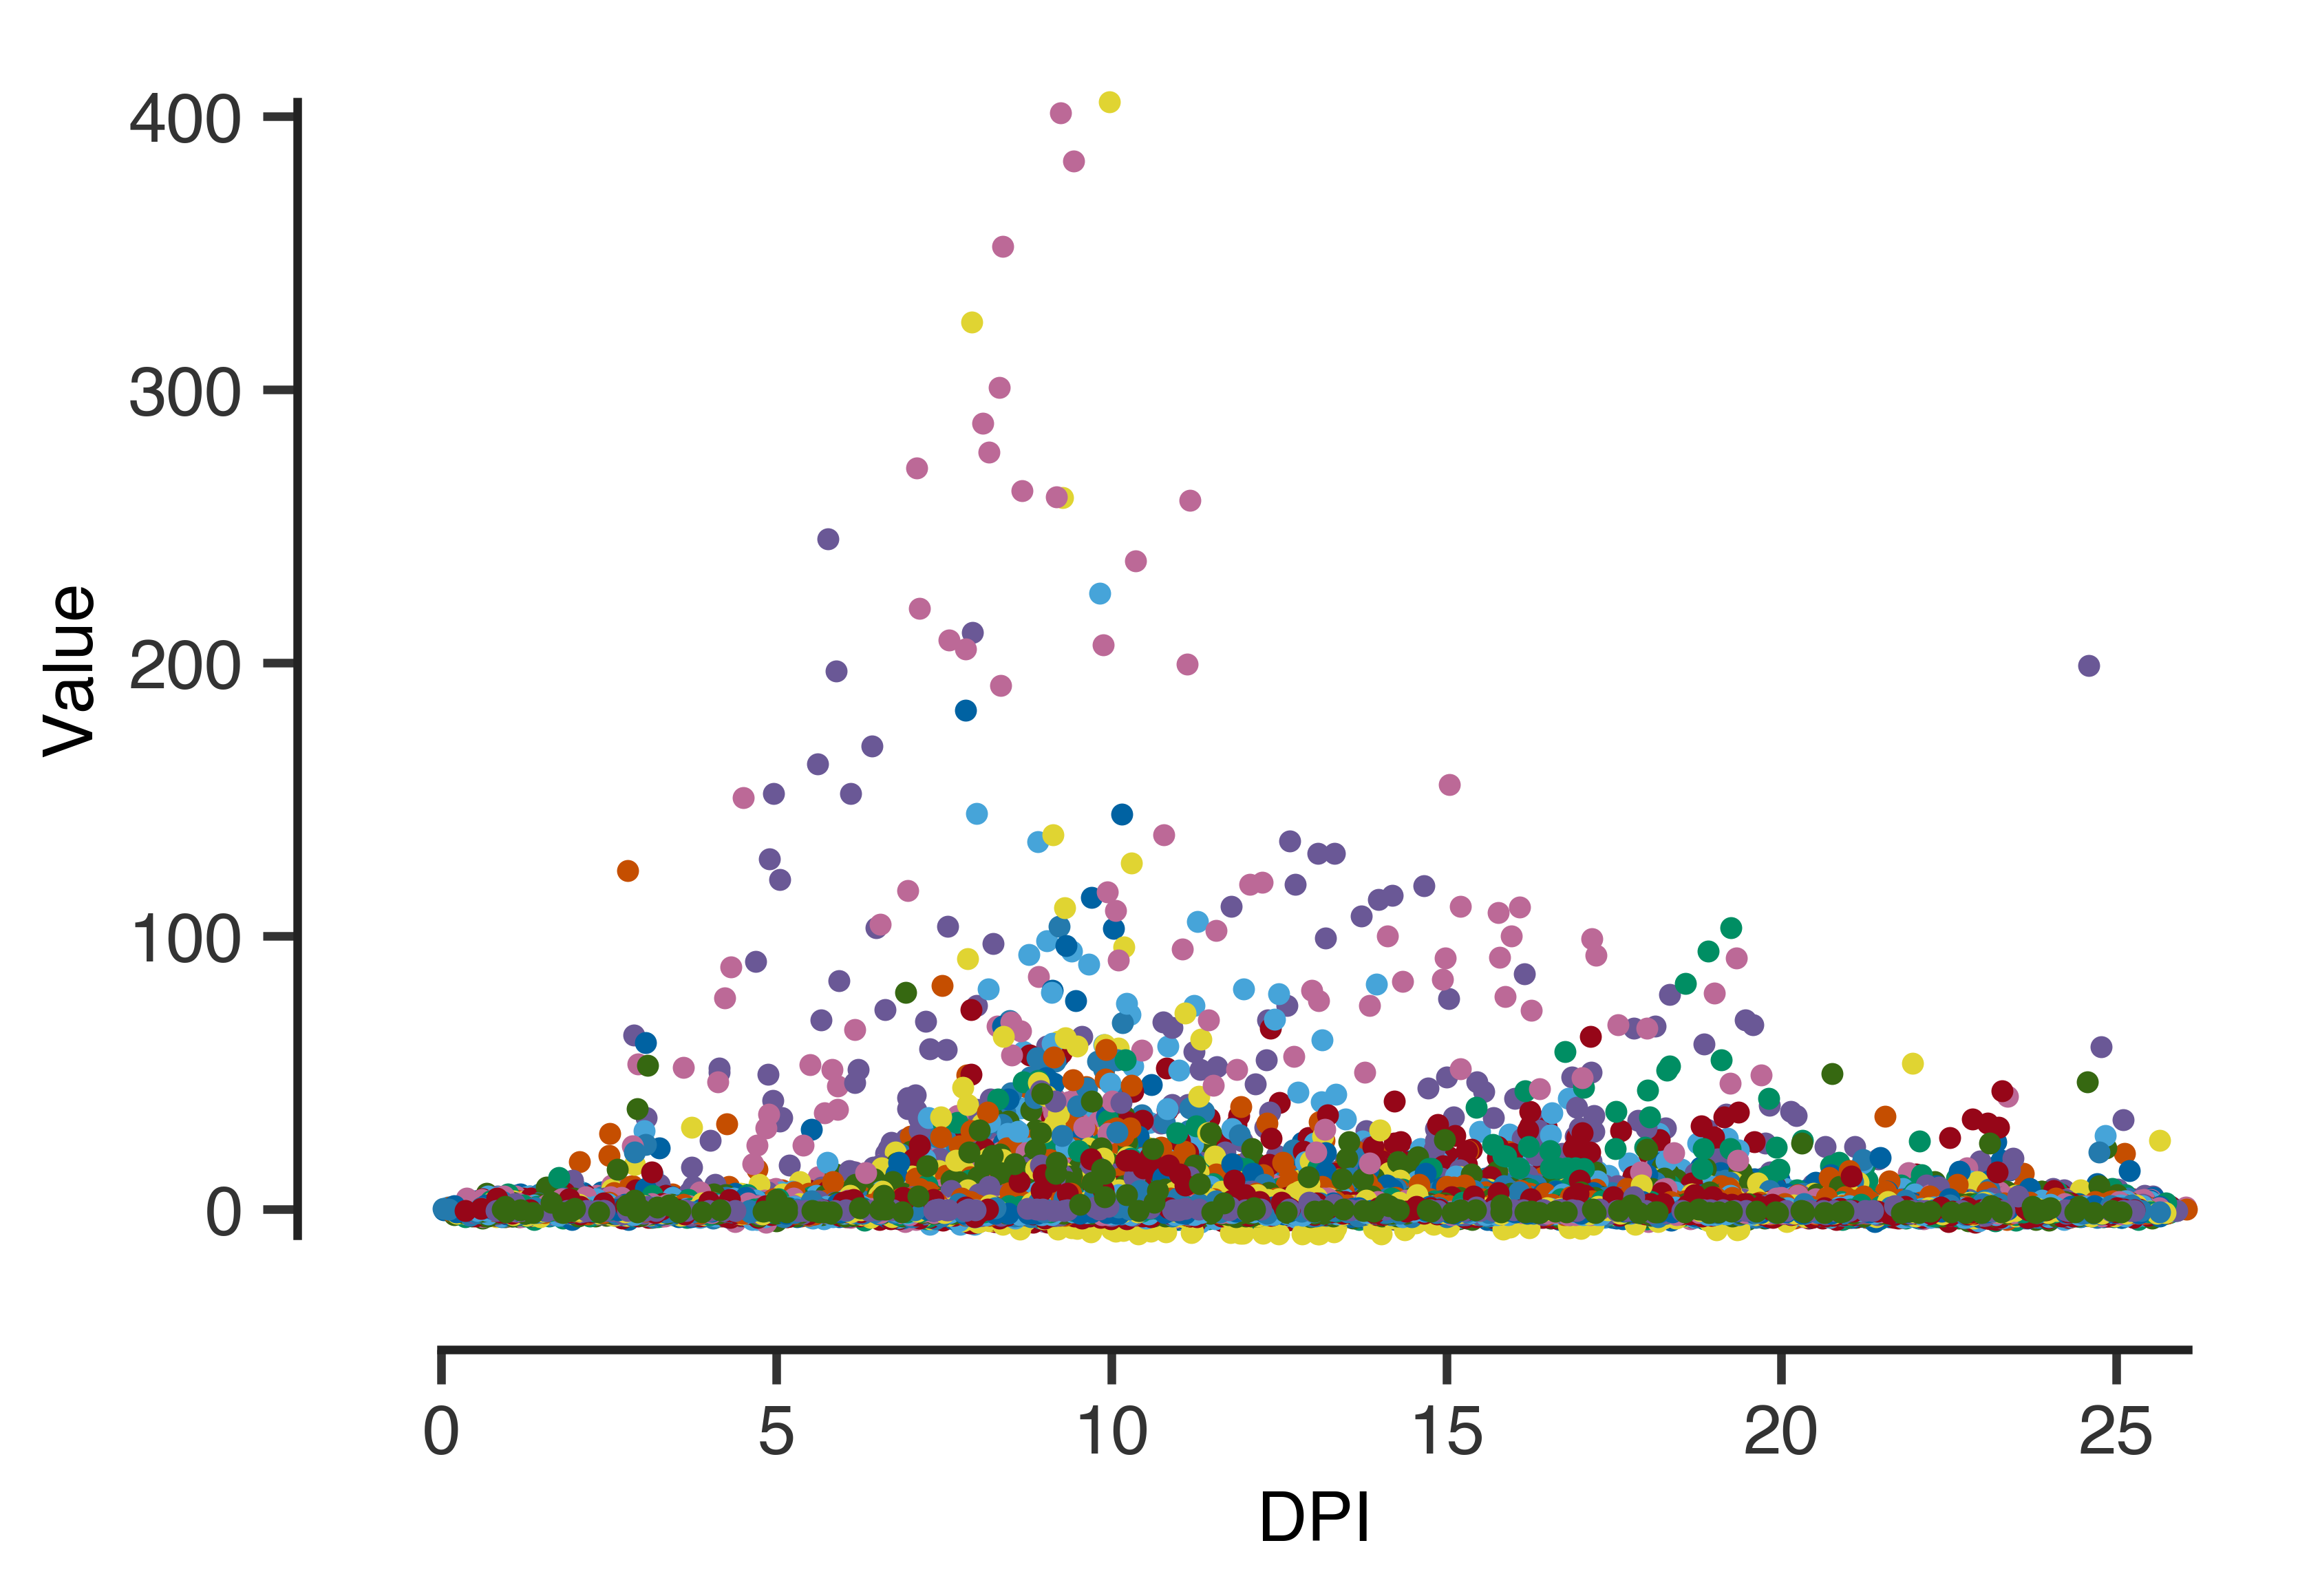

In [31]:
size = 8
for v in variables:
    plt.scatter(time_experimental+0.3*np.random.randn(len(normalized_experimental[v])),
                normalized_experimental[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

In [32]:
max(all_experimental_variances)

425.59027147242404

In [33]:
for v in variables:
    if experimental_variance[v] > 100:
        print('%s has variance %0.2f' %(v, experimental_variance[v]))

IFN-g has variance 150.67
inosine has variance 135.99
taurochenodeoxycholate has variance 140.79
AST has variance 106.02
ALT has variance 425.59


After zscoring...

In [34]:
for v in variables:
    if np.nanvar(normalized_experimental[v]) > 100:
        print('%s has variance %0.2f' %(v, np.nanvar(normalized_experimental[v])))

Erythrocyte-B has variance 1283.37
Erythrocyte-A has variance 186.70
IFN-g has variance 2098.81
isobutyrylcarnitine (C4) has variance 118.32
margaroylcarnitine* has variance 191.28
IL-12P70 has variance 335.20
IL-2 has variance 277.02
orotate has variance 425.65
methylsuccinate has variance 265.28
IL-3 has variance 170.30
stearoylcarnitine (C18) has variance 276.38
pipecolate has variance 201.16
dihomo-linoleoylcarnitine (C20:2)* has variance 144.13
arachidoylcarnitine (C20)* has variance 105.58
bilirubin (Z,Z) has variance 162.54
glycosyl-N-palmitoyl-sphingosine (d18:1/16:0) has variance 227.26
MCP-1 has variance 442.20
g/d T Cells has variance 338.77
formiminoglutamate has variance 300.95
IL-1a has variance 114.69
eicosenoylcarnitine (C20:1)* has variance 289.58
AST has variance 832.14
Total Bilirubin has variance 135.88
ALT has variance 3070.93
2-docosahexaenoylglycerol (22:6)* has variance 111.49
IL-23 has variance 333.02
itaconate has variance 8305.00


In [35]:
np.max(all_experimental_variances)

425.59027147242404

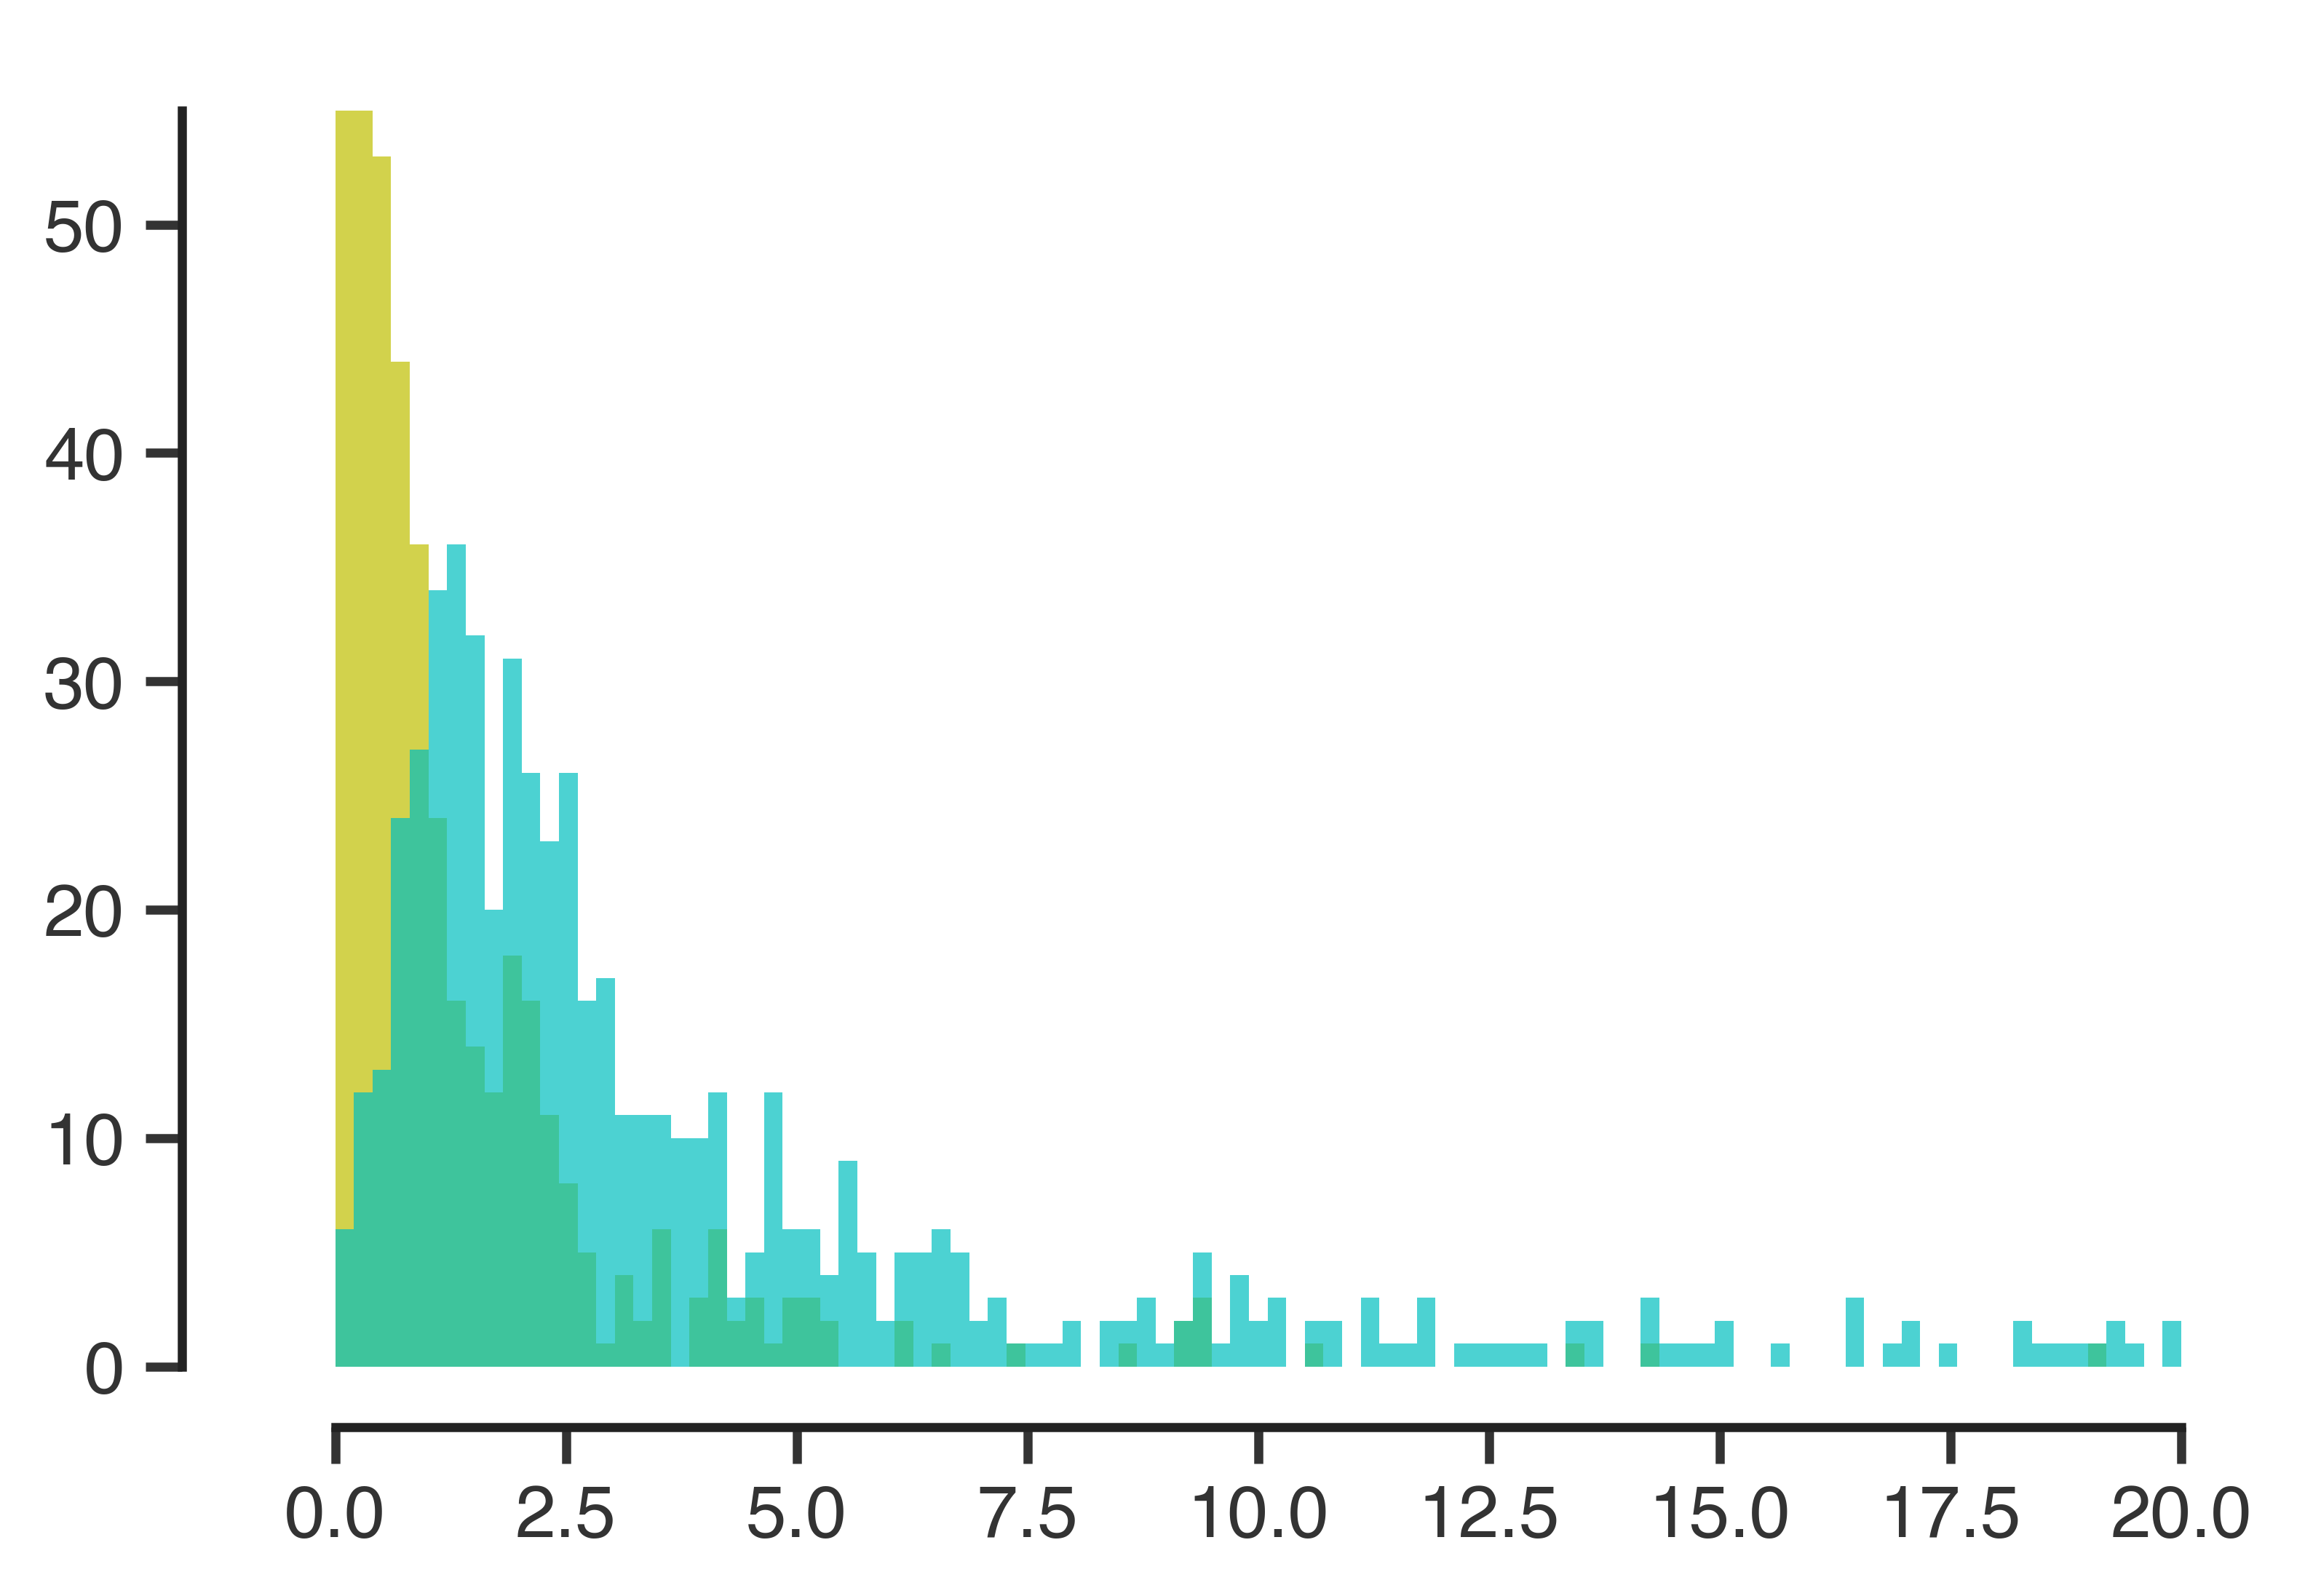

In [36]:
all_experimental_means = np.array([np.nanmean(normalized_experimental[v]) for v in variables]).flatten()
all_experimental_variances = np.array([np.nanvar(normalized_experimental[v]) for v in variables]).flatten()

# bins = np.linspace(min([min(all_experimental_means), min(all_experimental_variances)]),
#                    max([max(all_experimental_means), max(all_experimental_variances)]),500)

bins = np.linspace(0,20,100)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_experimental_means, bins=bins)
count_variances, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y', alpha=0.7)
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# negative log likelihood

\begin{align}
- \log p(\mbox{data} | \theta) &= -\log (\exp (-(x - \mu)^2/\sigma^2)) \\
&= (x - \mu)^2 / \sigma^2
\end{align}

In [37]:
import scipy.stats as ss

In [38]:
my_gaussian = ss.norm(loc=0., scale=1.)

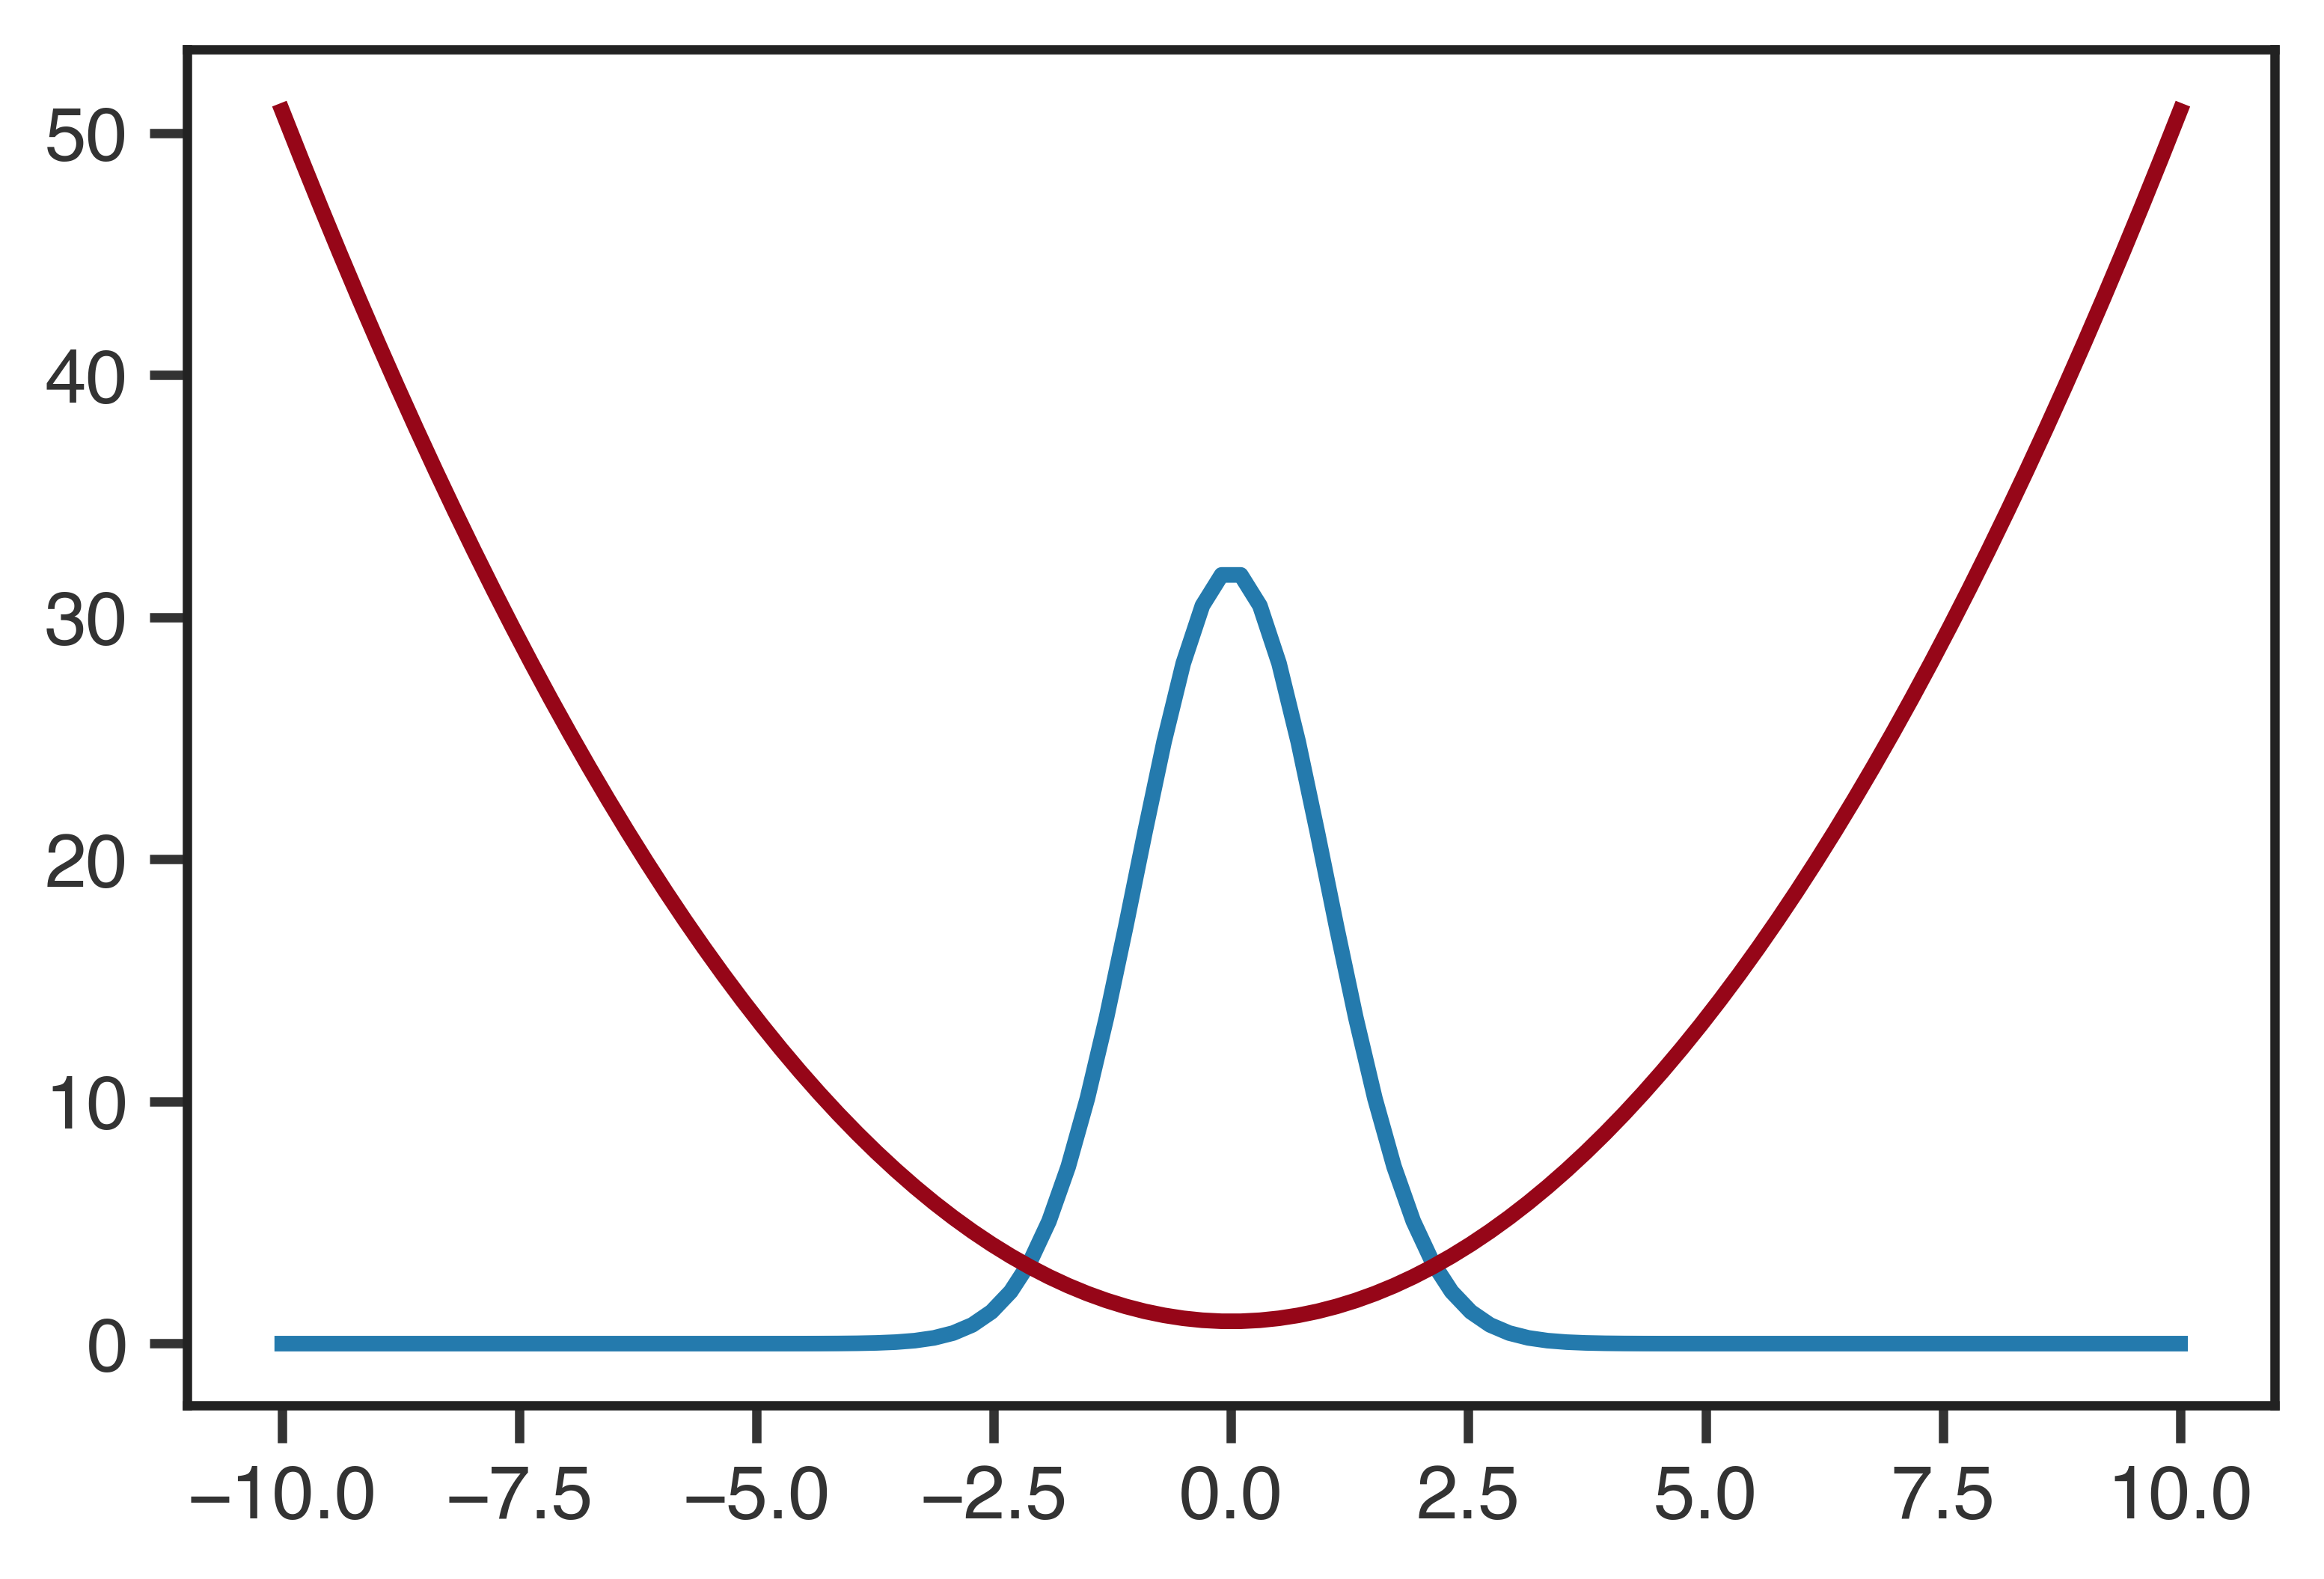

In [39]:
log_vals = [my_gaussian.logpdf([x]) for x in np.linspace(-10,10,100)]
vals = [my_gaussian.pdf([x]) for x in np.linspace(-10,10,100)]
plt.plot(np.linspace(-10,10,100), 80*np.array(vals))
plt.plot(np.linspace(-10,10,100), -np.array(log_vals))

In [40]:
np.min(-np.array(log_vals))

0.92404005345770801

In [41]:
neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    neg_ll[v] = neg_logpdf

# Histogram of negative log likelihoods

In [42]:
neg_ll[v]

array([   0.96910491,    1.3135397 ,    1.57854082,    1.56908731,
          0.92225532,    1.50545242,    4.3952034 ,    0.99716404,
          0.99871355,    1.4145028 ,    2.04866129,    0.92726859,
          1.21789248,    1.39737116,    6.38183033,    2.00401579,
          1.00065288,    0.9399936 ,    1.2902474 ,    1.39832954,
          1.13499682,    7.27009108,    1.38088307,    1.38654783,
          1.04565242,    1.28925076,    1.28504905,    1.1041607 ,
          0.99744599,    1.42995392,    0.91923797,   13.53747639,
         12.85249925,    0.92366282,    1.32420831,  138.25504712,
        137.66404868,  196.65110286,  219.73028545,  419.0616971 ,
        903.35762313,  146.94262799,   86.9970837 ,  788.47307001,
          2.64550038,   14.6821628 ,  109.67065996,   50.81524916,
         86.90016226,   11.17745693,    0.99688259,   24.51854408,
          4.4029539 ,  246.63851875,   45.17871532,    1.24234258,
          1.10720738,    1.36982617,    0.91976287,    3.80098

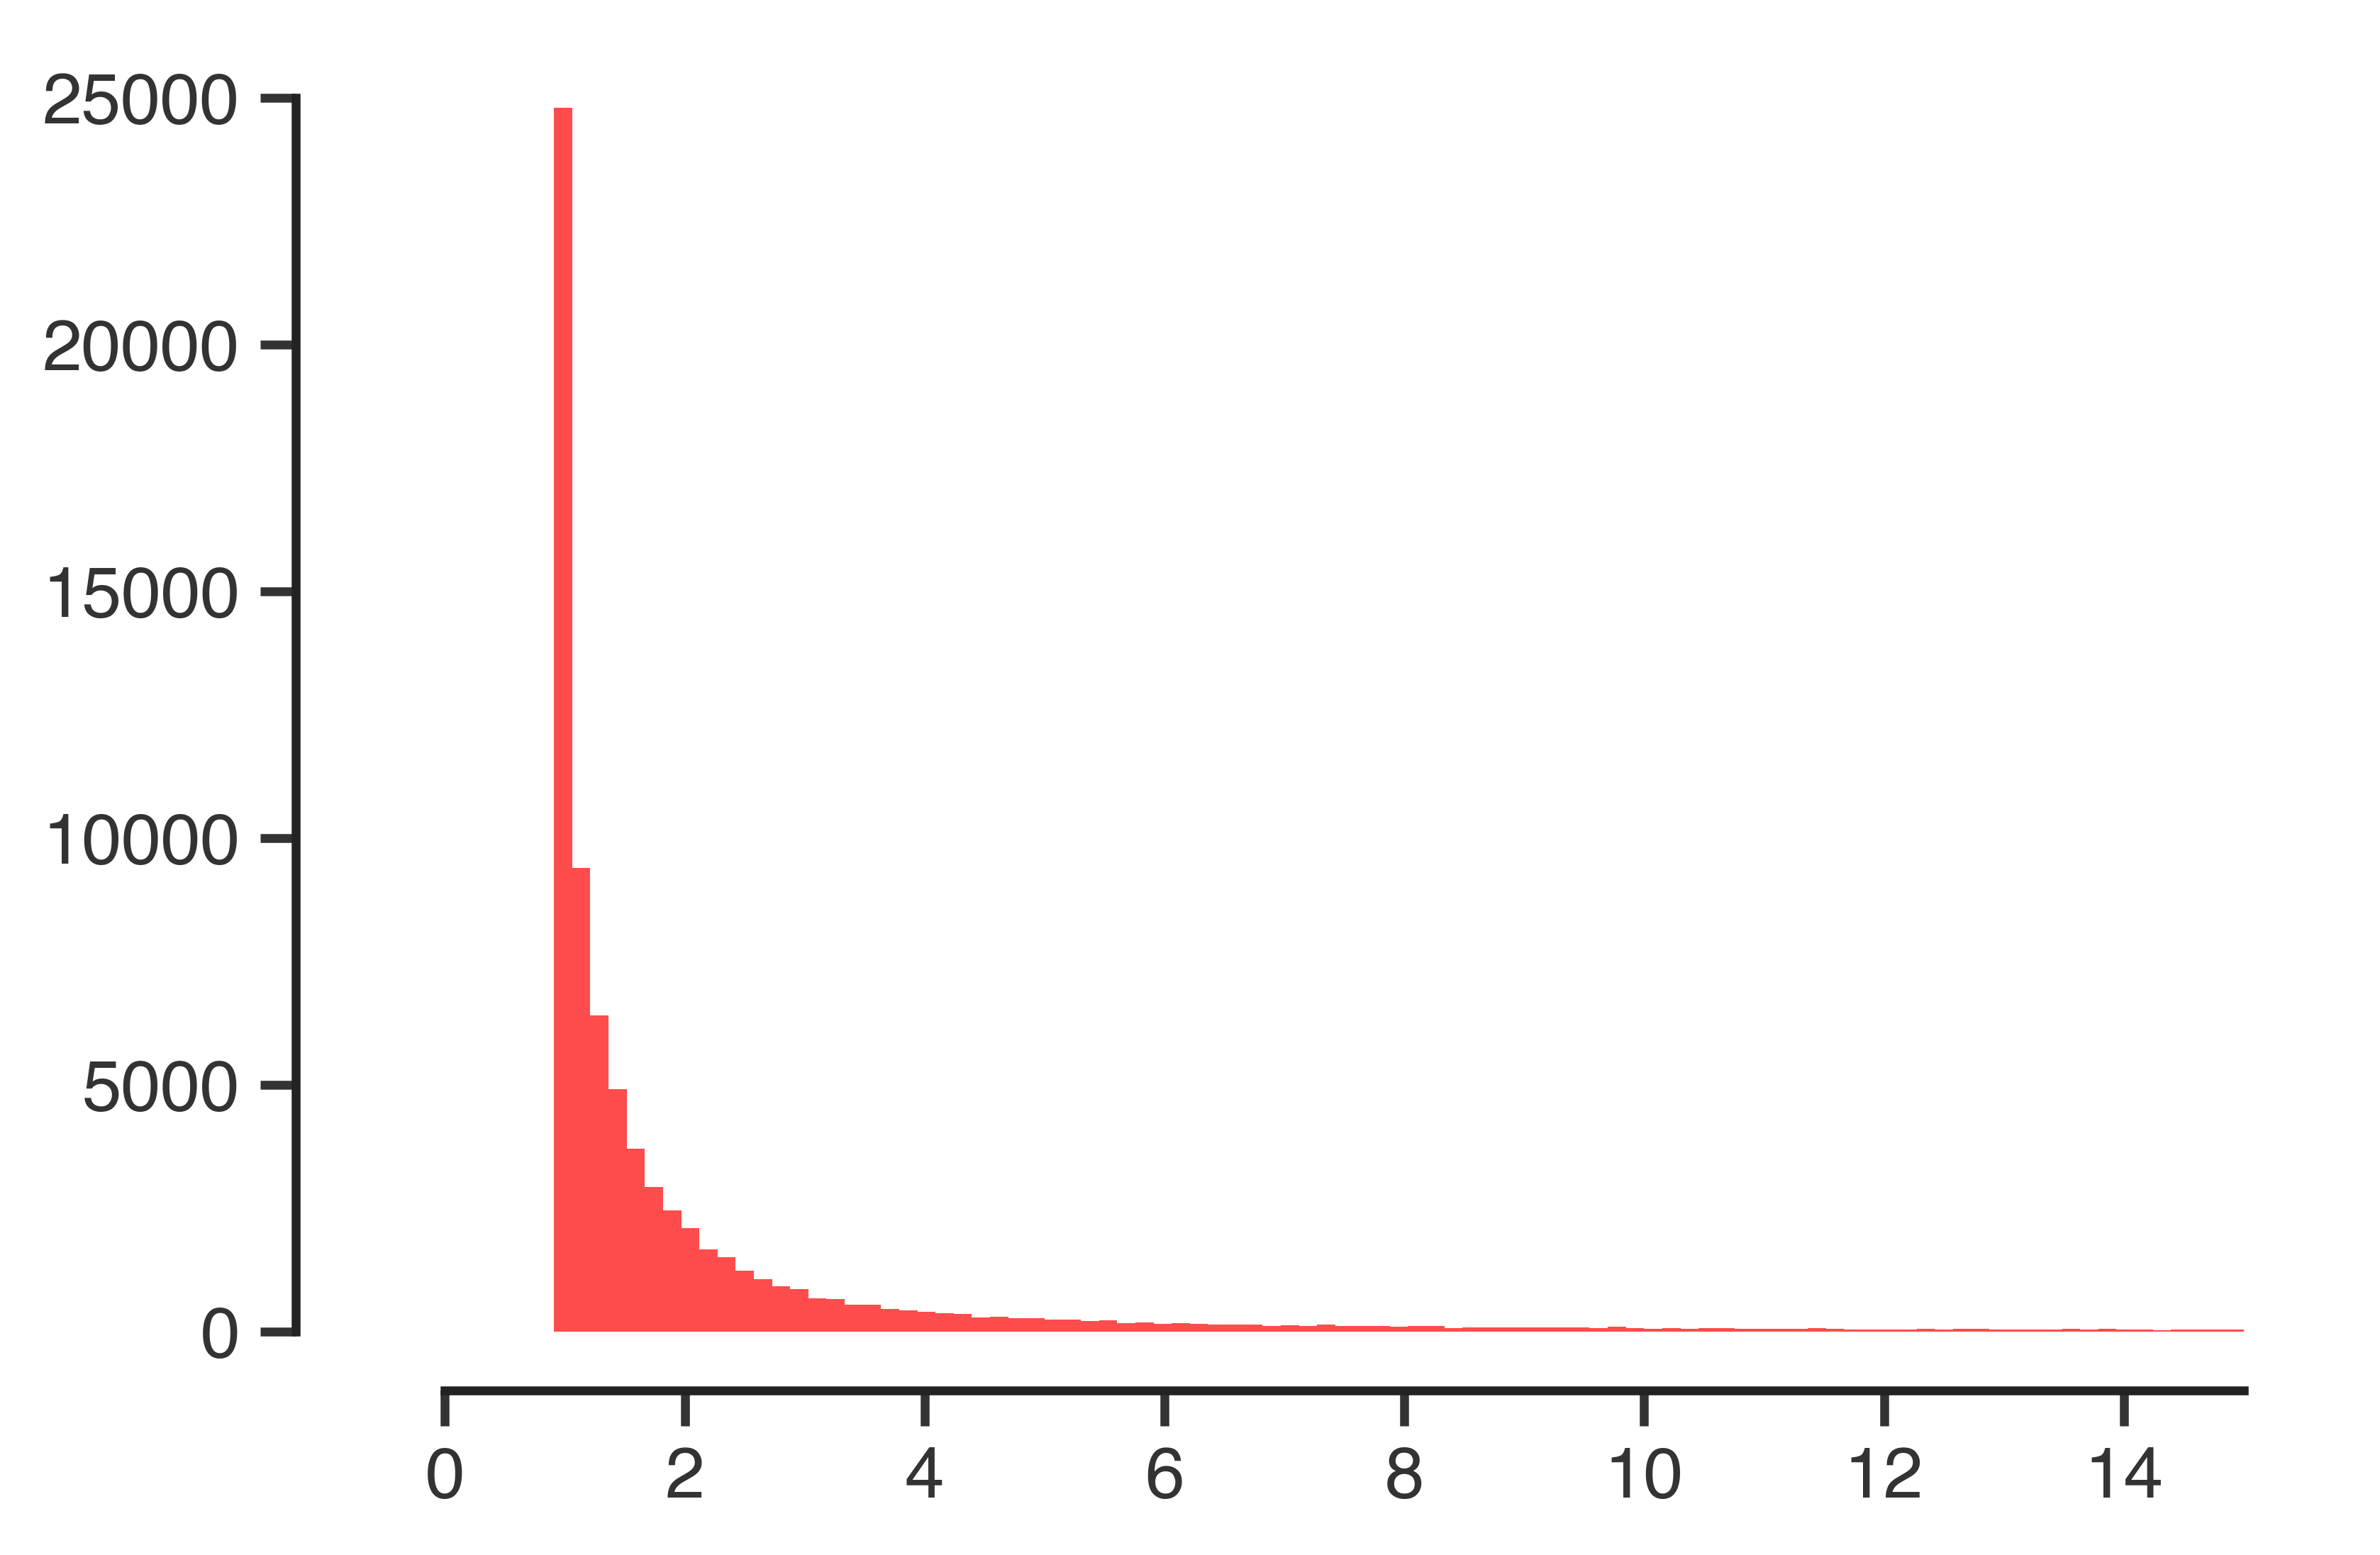

In [43]:
all_nlls = np.array([neg_ll[v] for v in variables]).flatten()

bins = np.linspace(0,15,100)
count, bins = np.histogram(all_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# Sum of log likelihoods (aka product of likelihoods)  
(and max)

In [44]:
sum_neg_ll = collections.defaultdict(list)
max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    sum_neg_ll[v] = np.sum(neg_logpdf)
    max_neg_ll[v] = np.max(neg_logpdf)

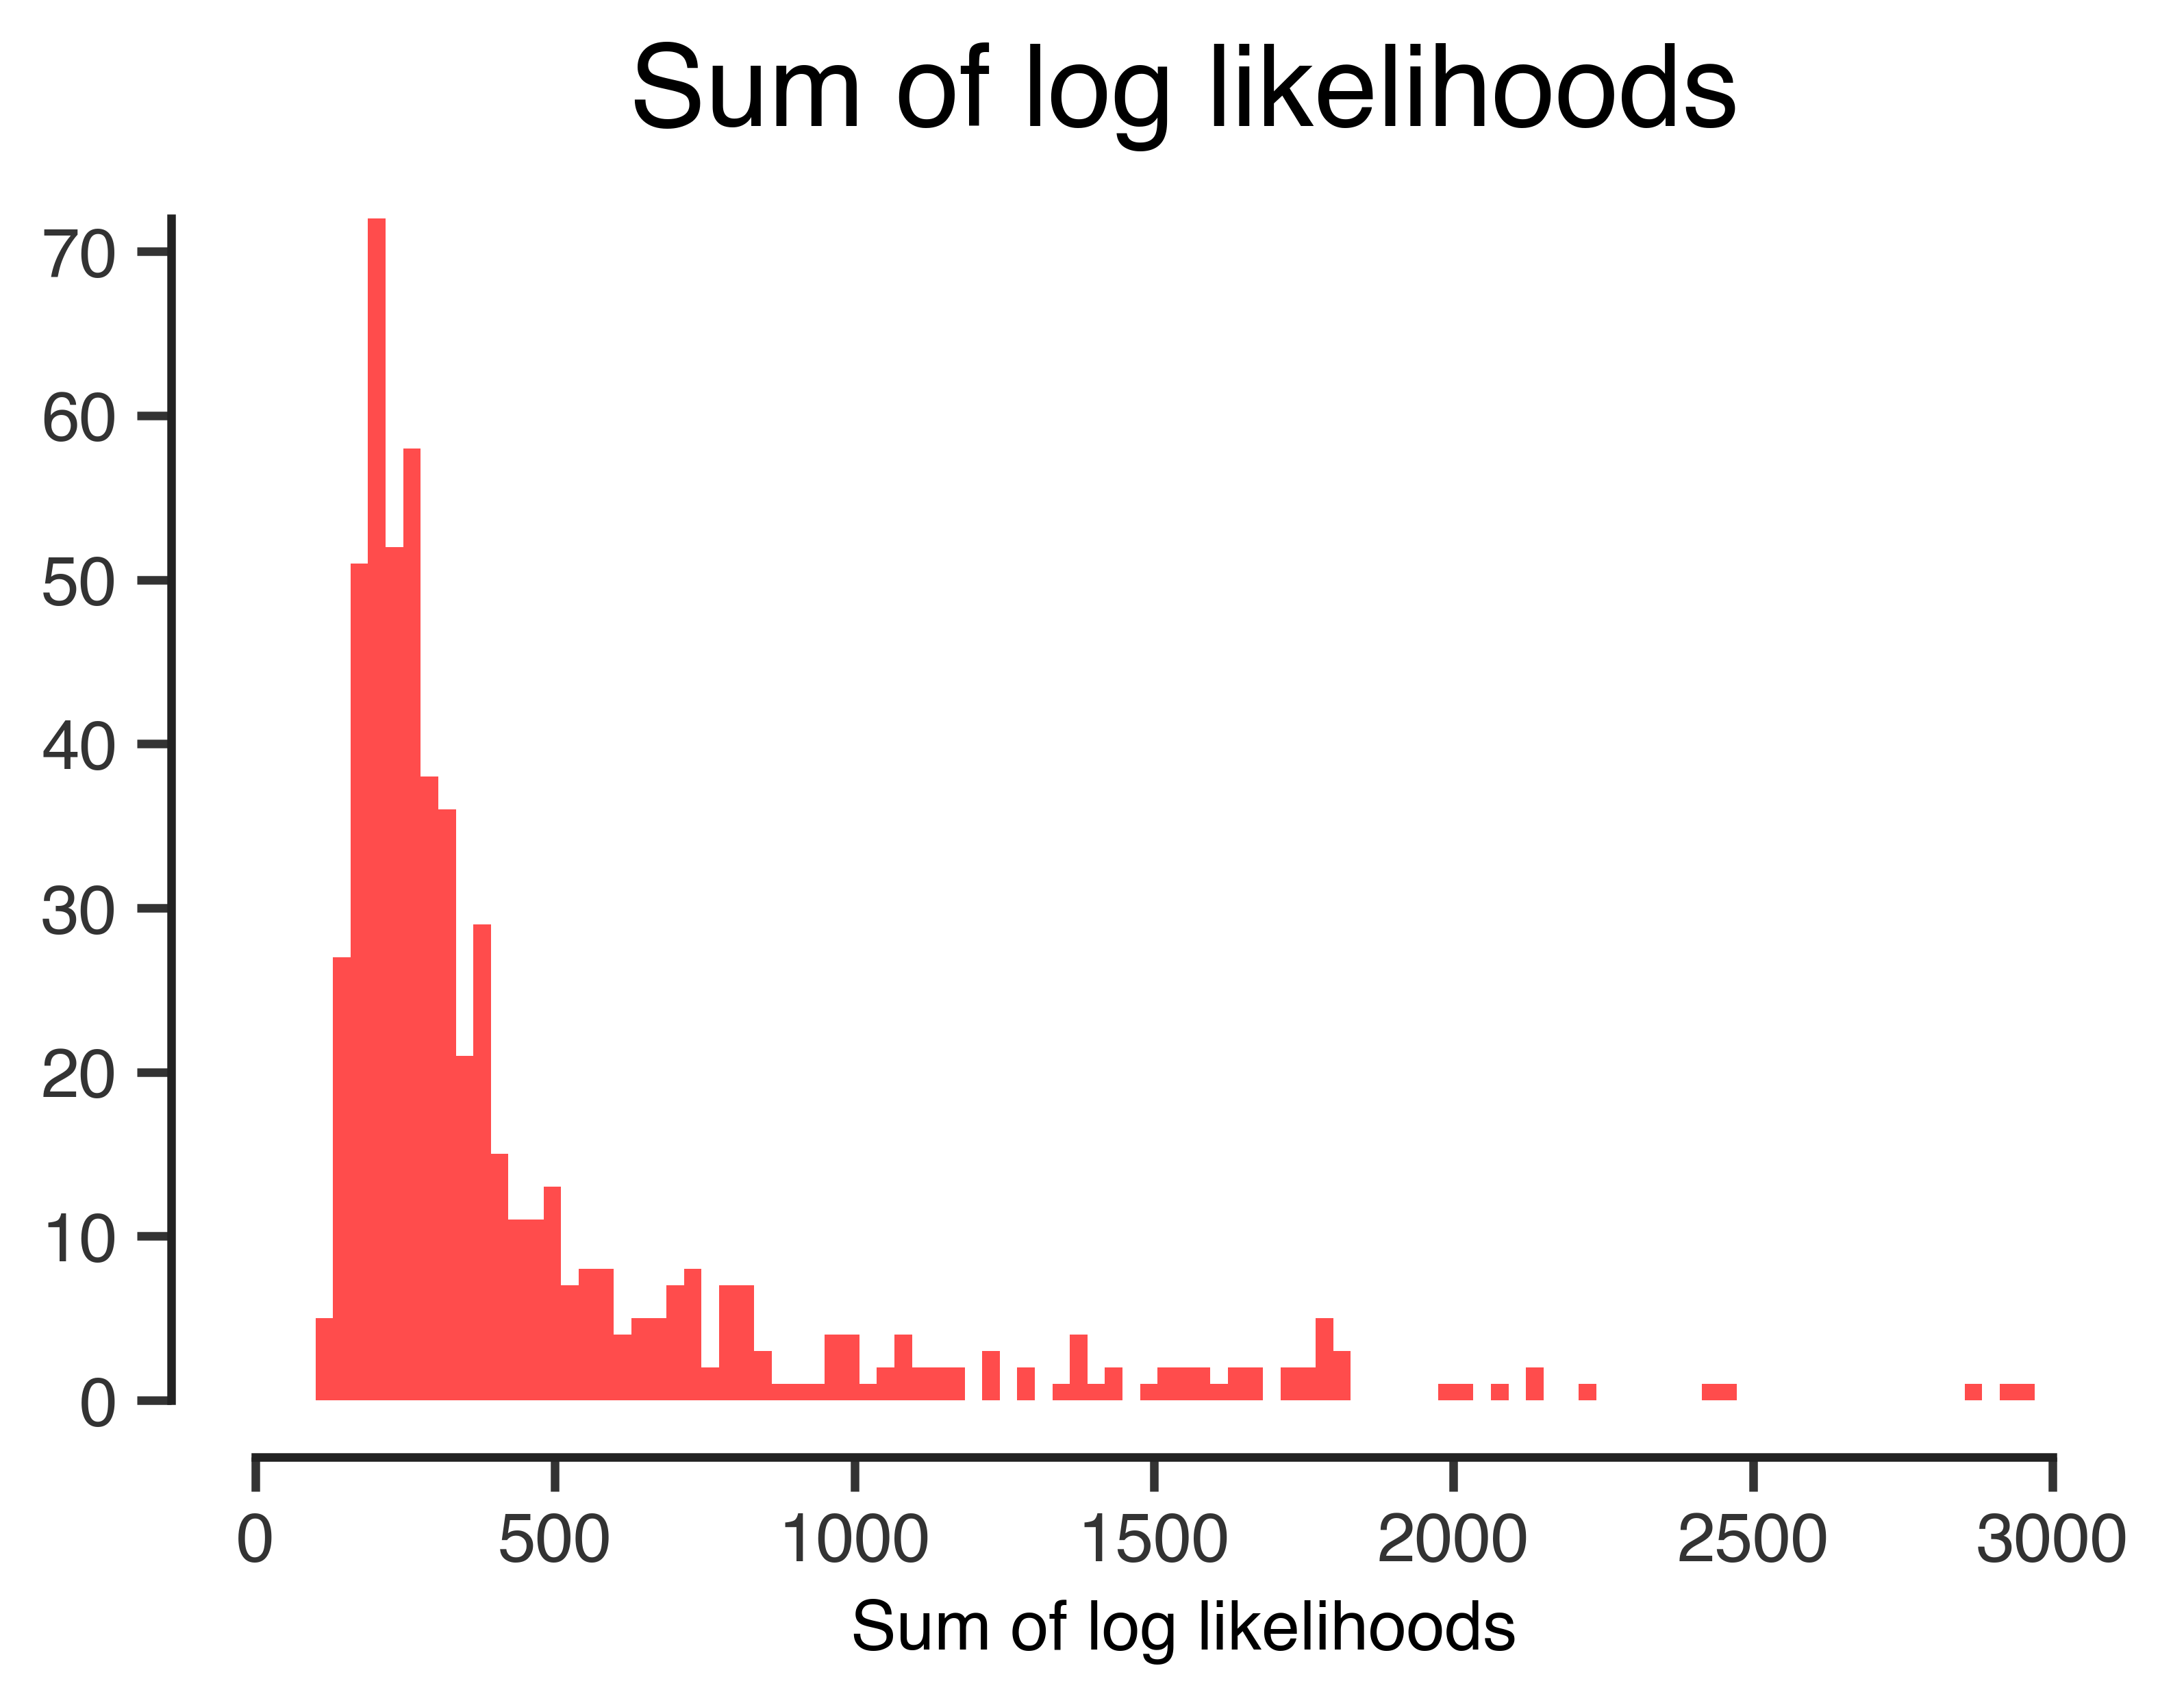

In [46]:
sum_nlls = np.array([sum_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

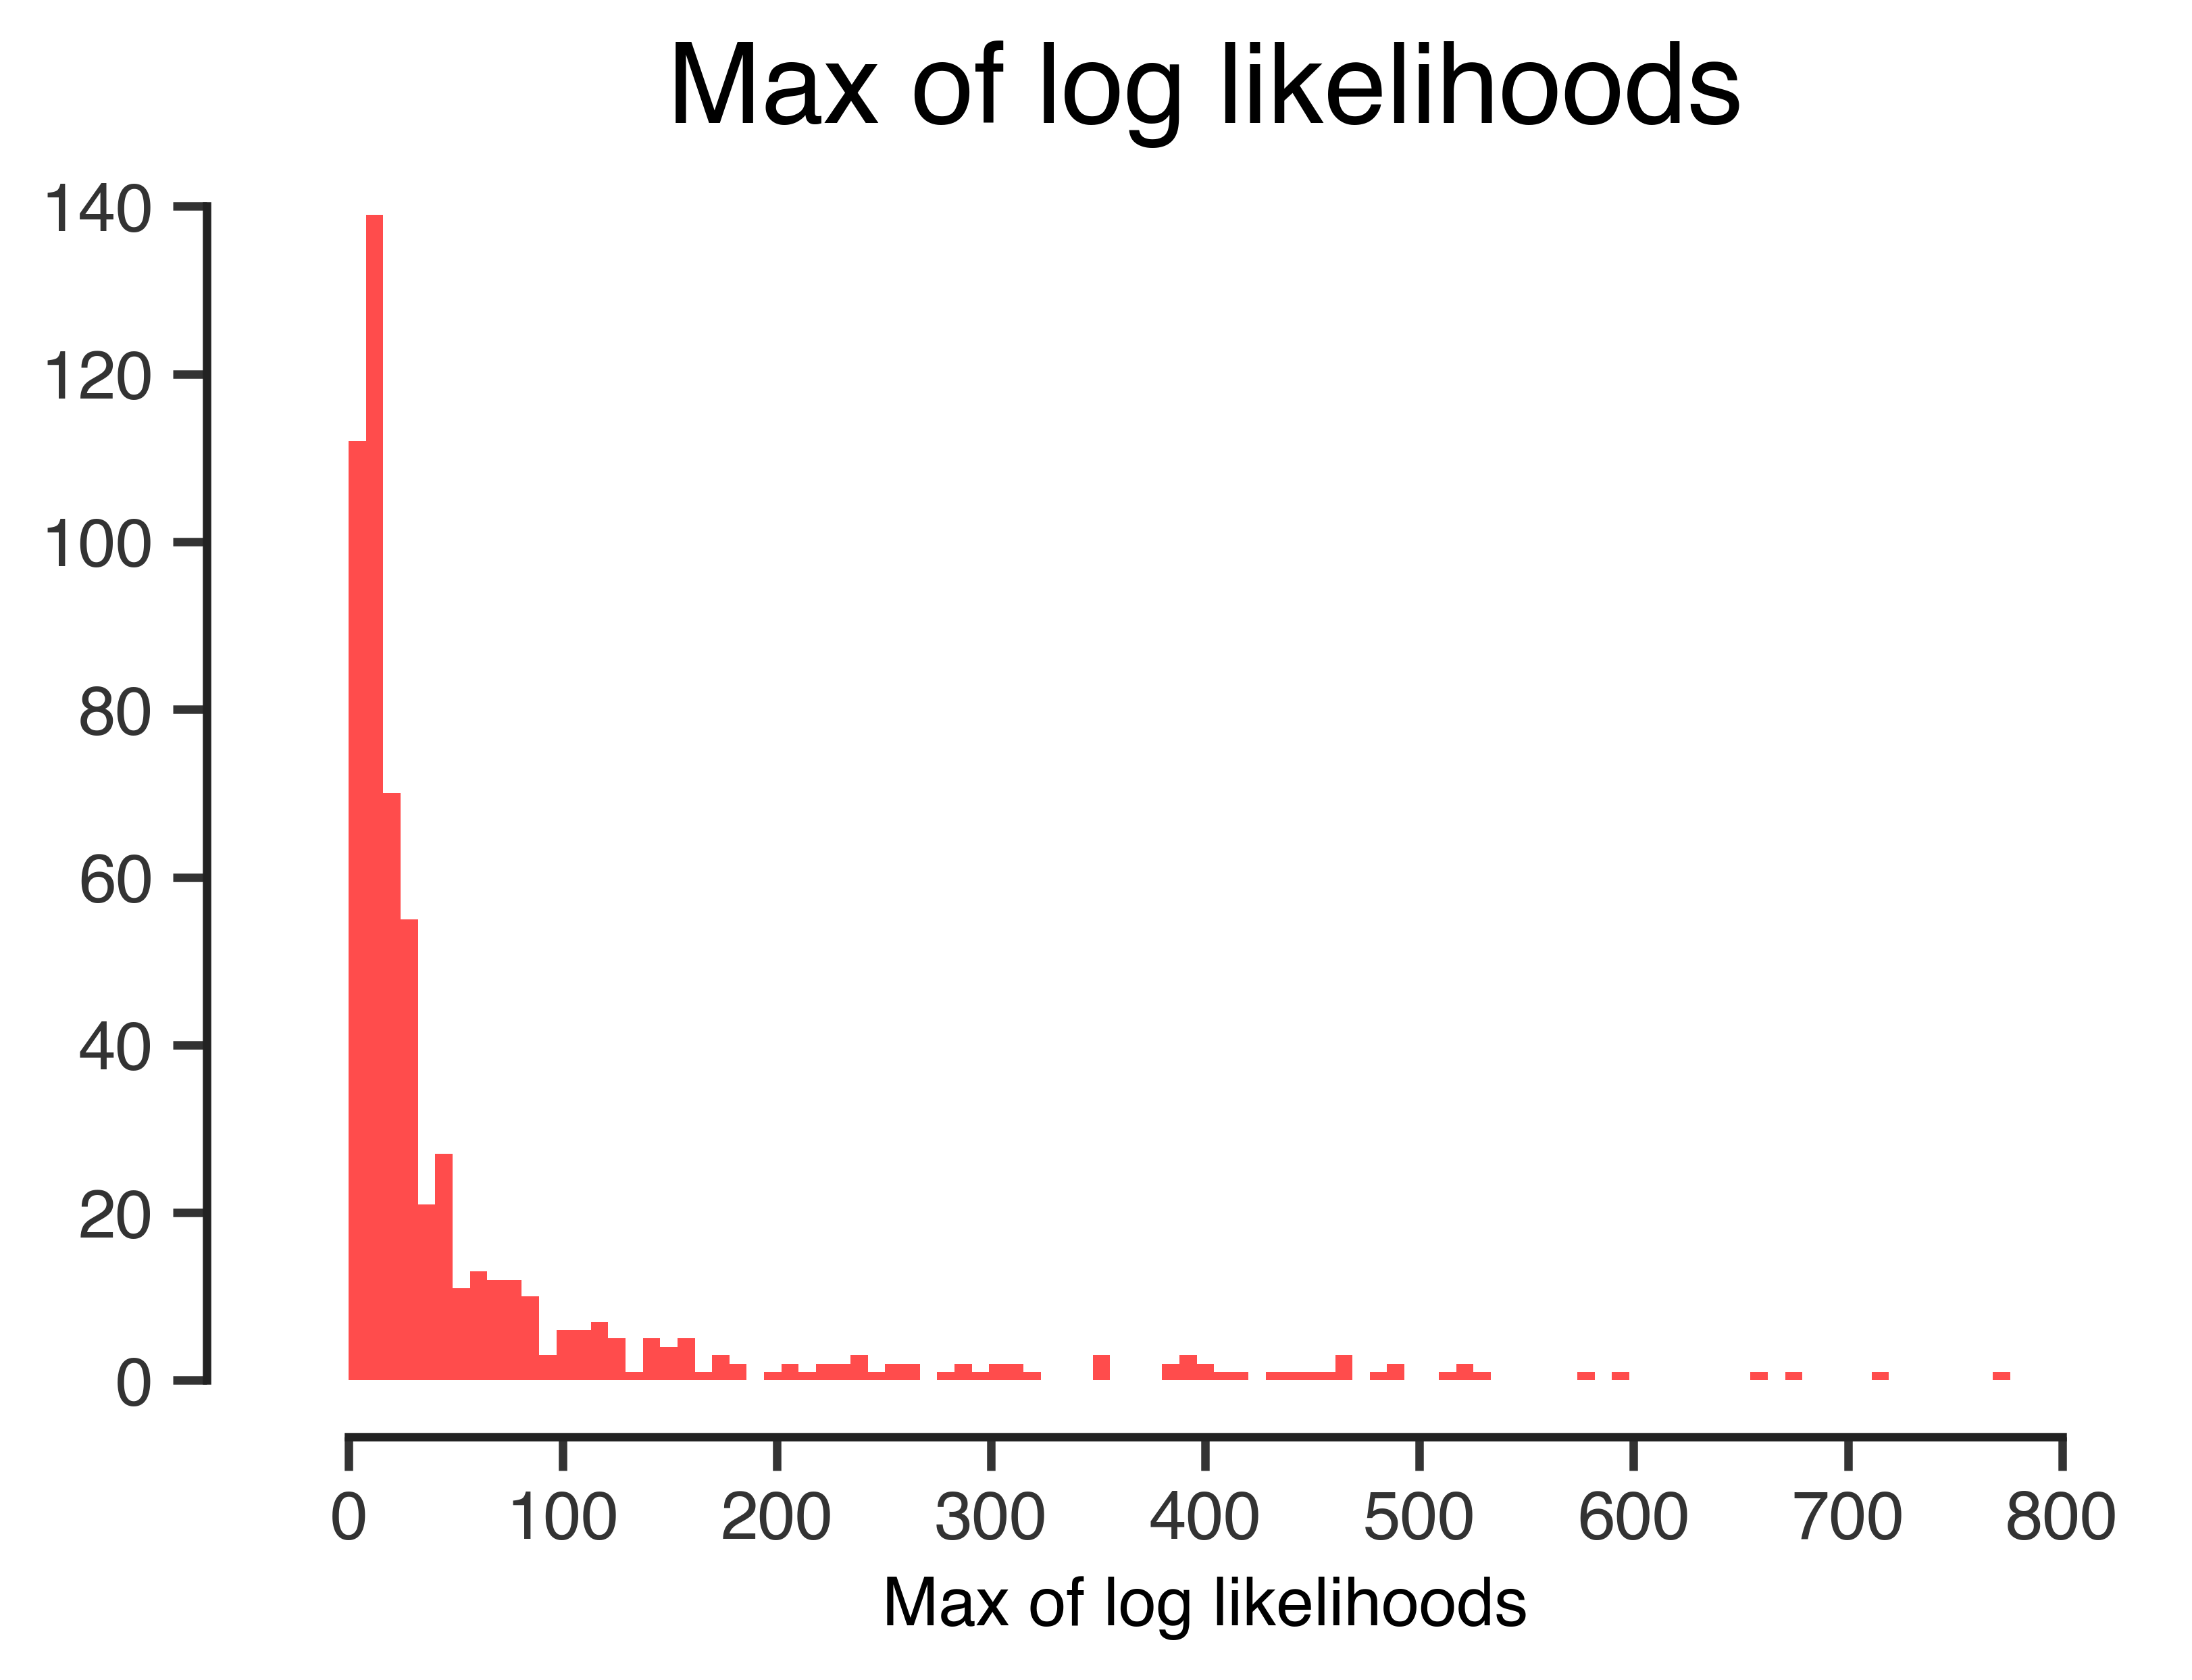

In [47]:
max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(0,800,100)
count, bins = np.histogram(max_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Max of log likelihoods')
plt.xlabel('Max of log likelihoods')

In [48]:
import operator

In [49]:
least_likely_data = sorted(sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [50]:
for i in range(10):
    print(least_likely_data[i])

('itaconate', 810230.33516927483)
('ALT', 214907.65286574414)
('IFN-g', 160192.35013916669)
('Erythrocyte-B', 114381.71793760544)
('AST', 59145.876309140127)
('orotate', 39470.331234565077)
('MCP-1', 33171.656903271105)
('methylsuccinate', 28122.900710049842)
('g/d T Cells', 26715.801465181976)
('IL-12P70', 23474.289876918501)


In [51]:
least_likely_max_data = sorted(max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [52]:
for i in range(10):
    print(least_likely_max_data[i])

('ALT', 82133.847392006996)
('itaconate', 80561.748939807425)
('IFN-g', 30139.139566754569)
('AST', 25417.025016032429)
('IL-23', 19815.170565516546)
('IL-2', 16697.116178945191)
('IL-12P70', 11358.393886147958)
('formiminoglutamate', 10472.459249917343)
('Erythrocyte-B', 9100.3874418751966)
('IL-3', 7689.5385224384036)


# Part 2

## Look at distribution of control - is it normal?

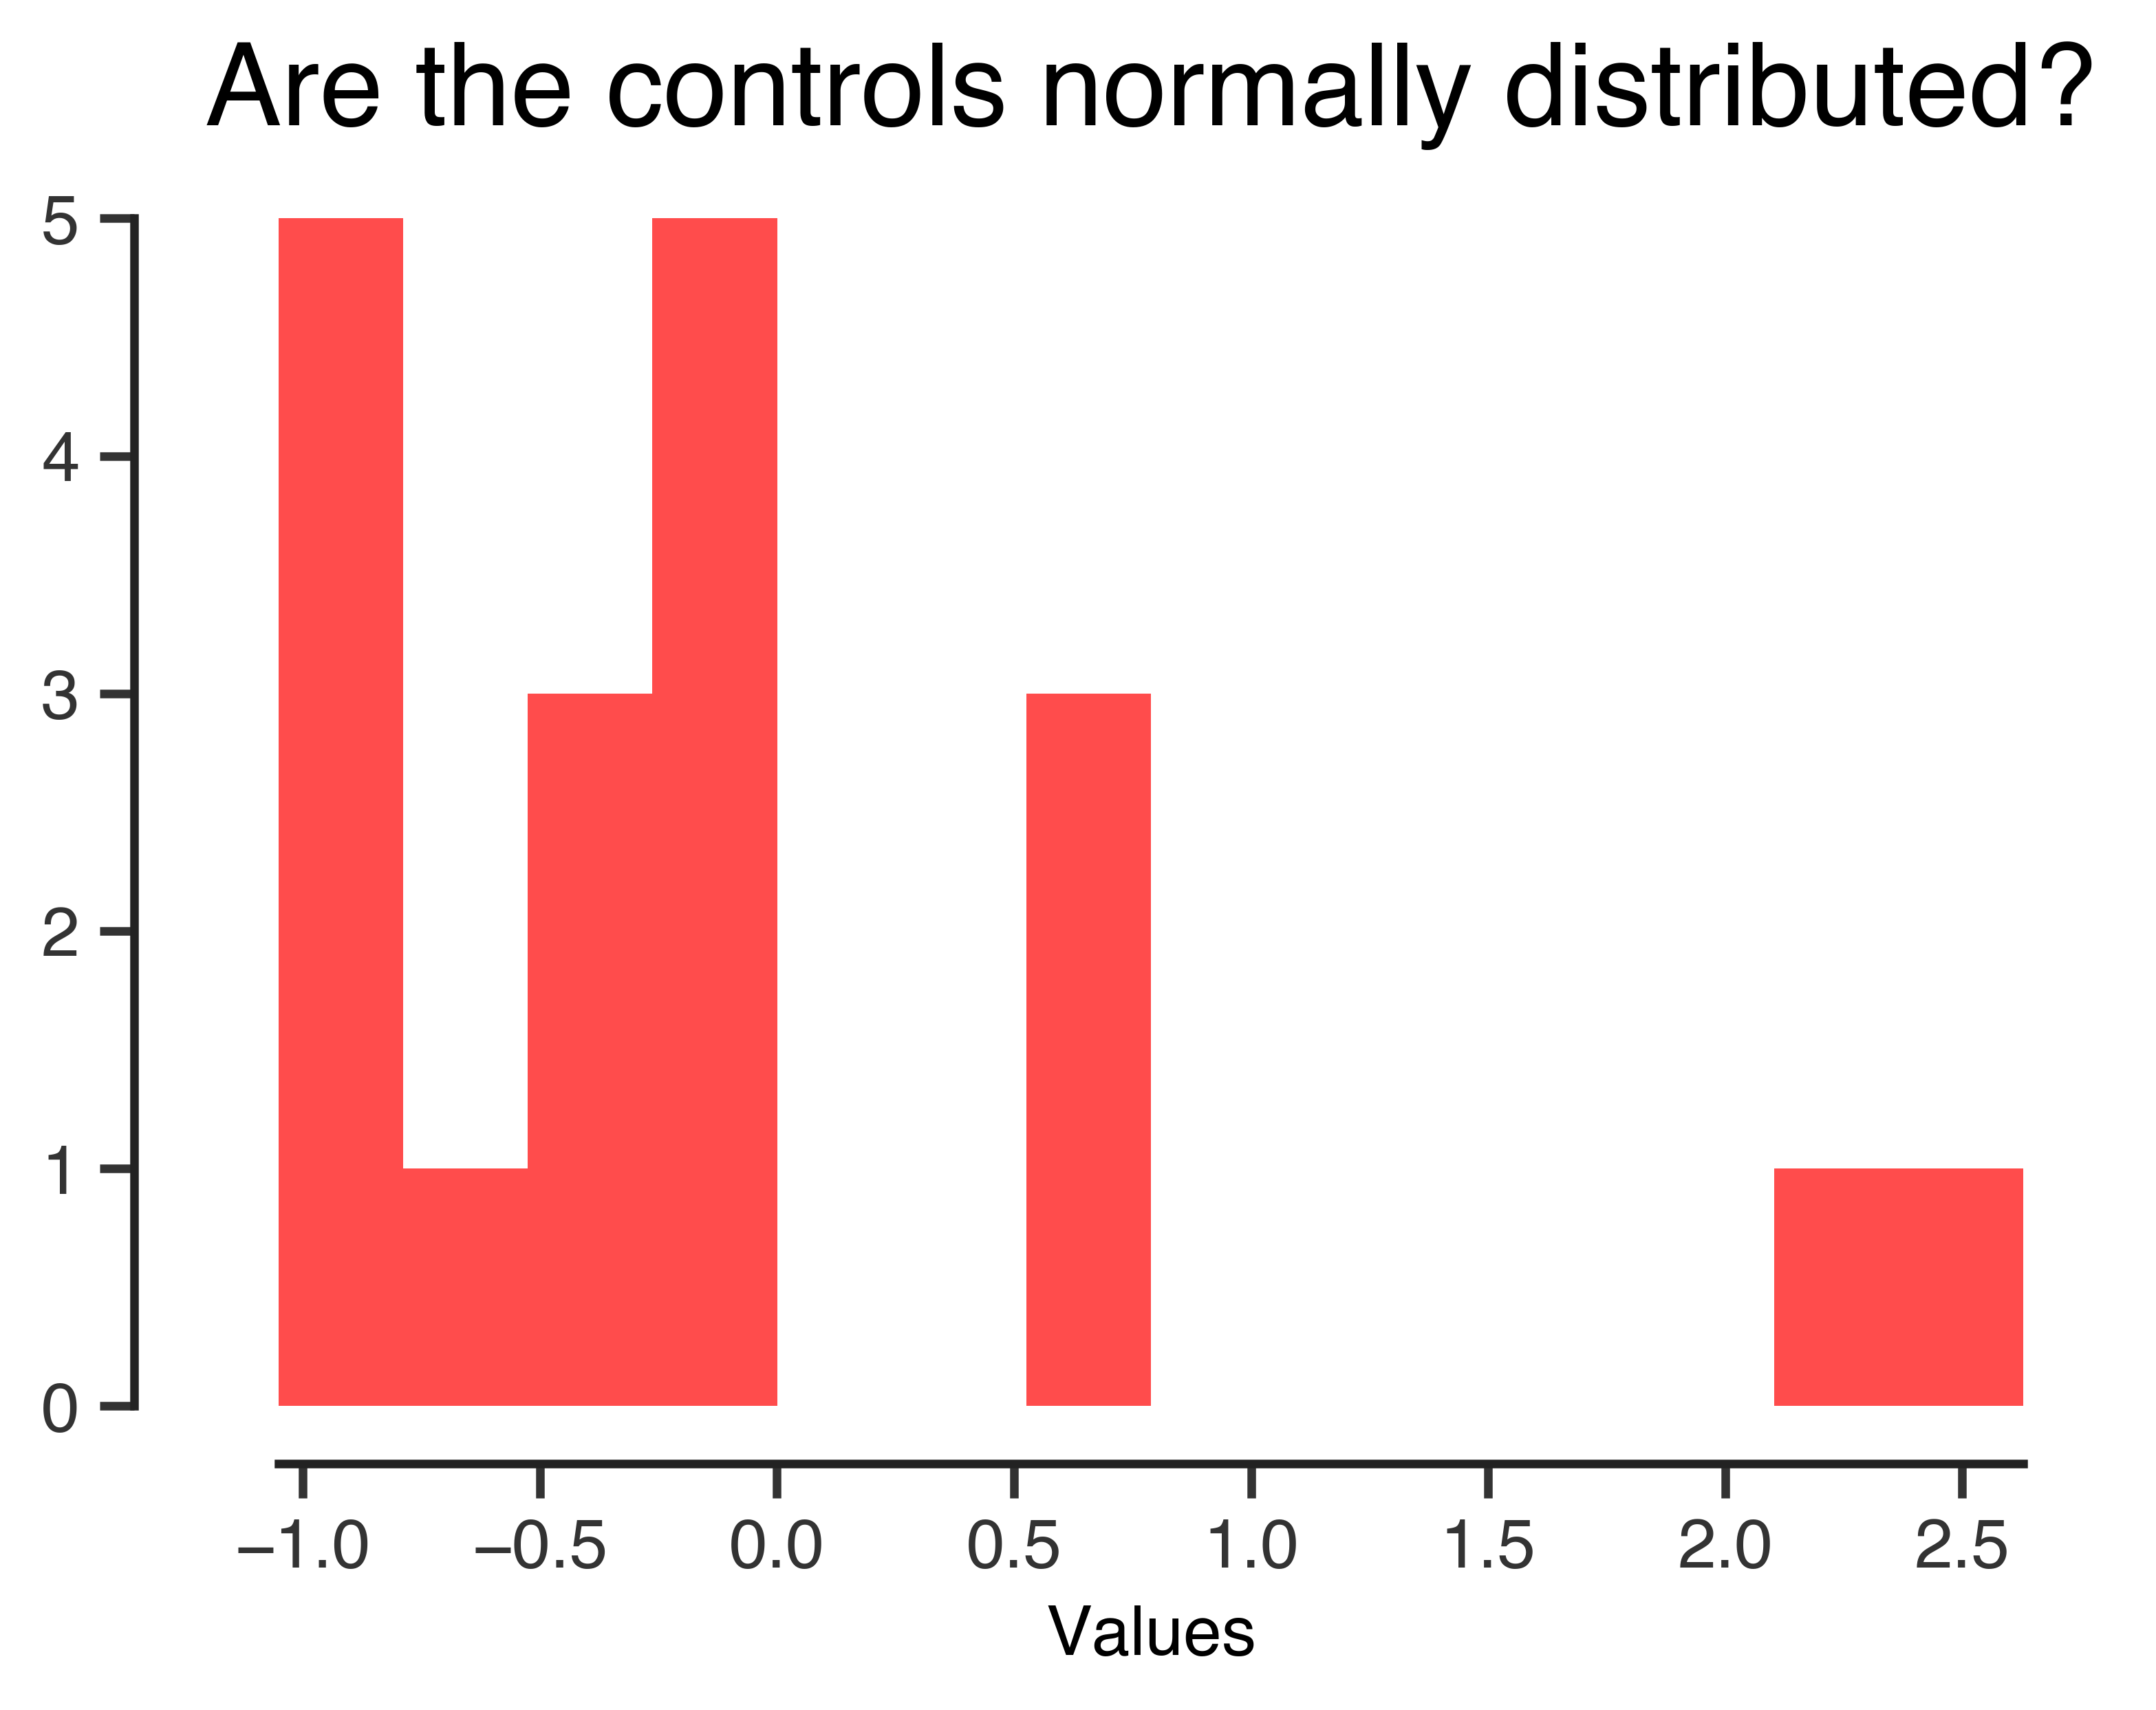

In [57]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

In [61]:
? ss.gamma.fit

In [69]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
ss.gamma.fit(this_var)

(0.81242607474028983, -1.0512828334165247, 1.1915191674101435)

In [79]:
ss.gamma.pdf(this_var, 0.81242, loc=-1.05, scale=1.19)

array([ 0.43678887,  0.53120563,  0.3574939 ,  0.32300165,  0.65124236,
        0.36287084,  0.03475189,  0.93696227,  0.17206879,  0.        ,
        0.81117359,  0.02684872,  0.34044875,  0.34218151,  0.88668836,
        0.45700761,  0.14580979,  0.1654564 ,  1.1337817 ])

In [80]:
ss.gamma.pdf(this_var, this_fit[0], loc=-1.05, scale=1.19)

array([ 0.43679003,  0.53120617,  0.35749536,  0.32300316,  0.65124162,
        0.36287227,  0.03475231,  0.93695605,  0.17207011,  0.        ,
        0.81117023,  0.02684905,  0.34045024,  0.34218299,  0.88668338,
        0.45700867,  0.145811  ,  0.16545769,  1.13376955])

In [82]:
this_fit[1]

-1.0512828334165247

In [90]:
scipy.stats.gamma.pdf(this_var, this_fit[0], loc=-1.051282833416524, scale=1.19)

array([ 0.43617436,  0.53040235,  0.35701583,  0.32257818,  0.65013639,
        0.36238402,  0.0347124 ,  0.93451414,  0.17185963,  0.        ,
        0.80947322,  0.02681837,  0.33999798,  0.34172799,  0.88457987,
        0.45635542,  0.14563467,  0.16525588,  1.12916589])

In [89]:
scipy.stats.gamma.pdf(this_var, this_fit[0], loc=-1.0512828334165247, scale=1.19)

array([  4.36174363e-01,   5.30402351e-01,   3.57015834e-01,
         3.22578179e-01,   6.50136389e-01,   3.62384019e-01,
         3.47123996e-02,   9.34514141e-01,   1.71859630e-01,
         6.51502223e+02,   8.09473224e-01,   2.68183723e-02,
         3.39997980e-01,   3.41727993e-01,   8.84579870e-01,
         4.56355419e-01,   1.45634675e-01,   1.65255881e-01,
         1.12916589e+00])

In [91]:
actual_though = ss.gamma.pdf(bins, 0.81242, loc=-1.05, scale=1.19)

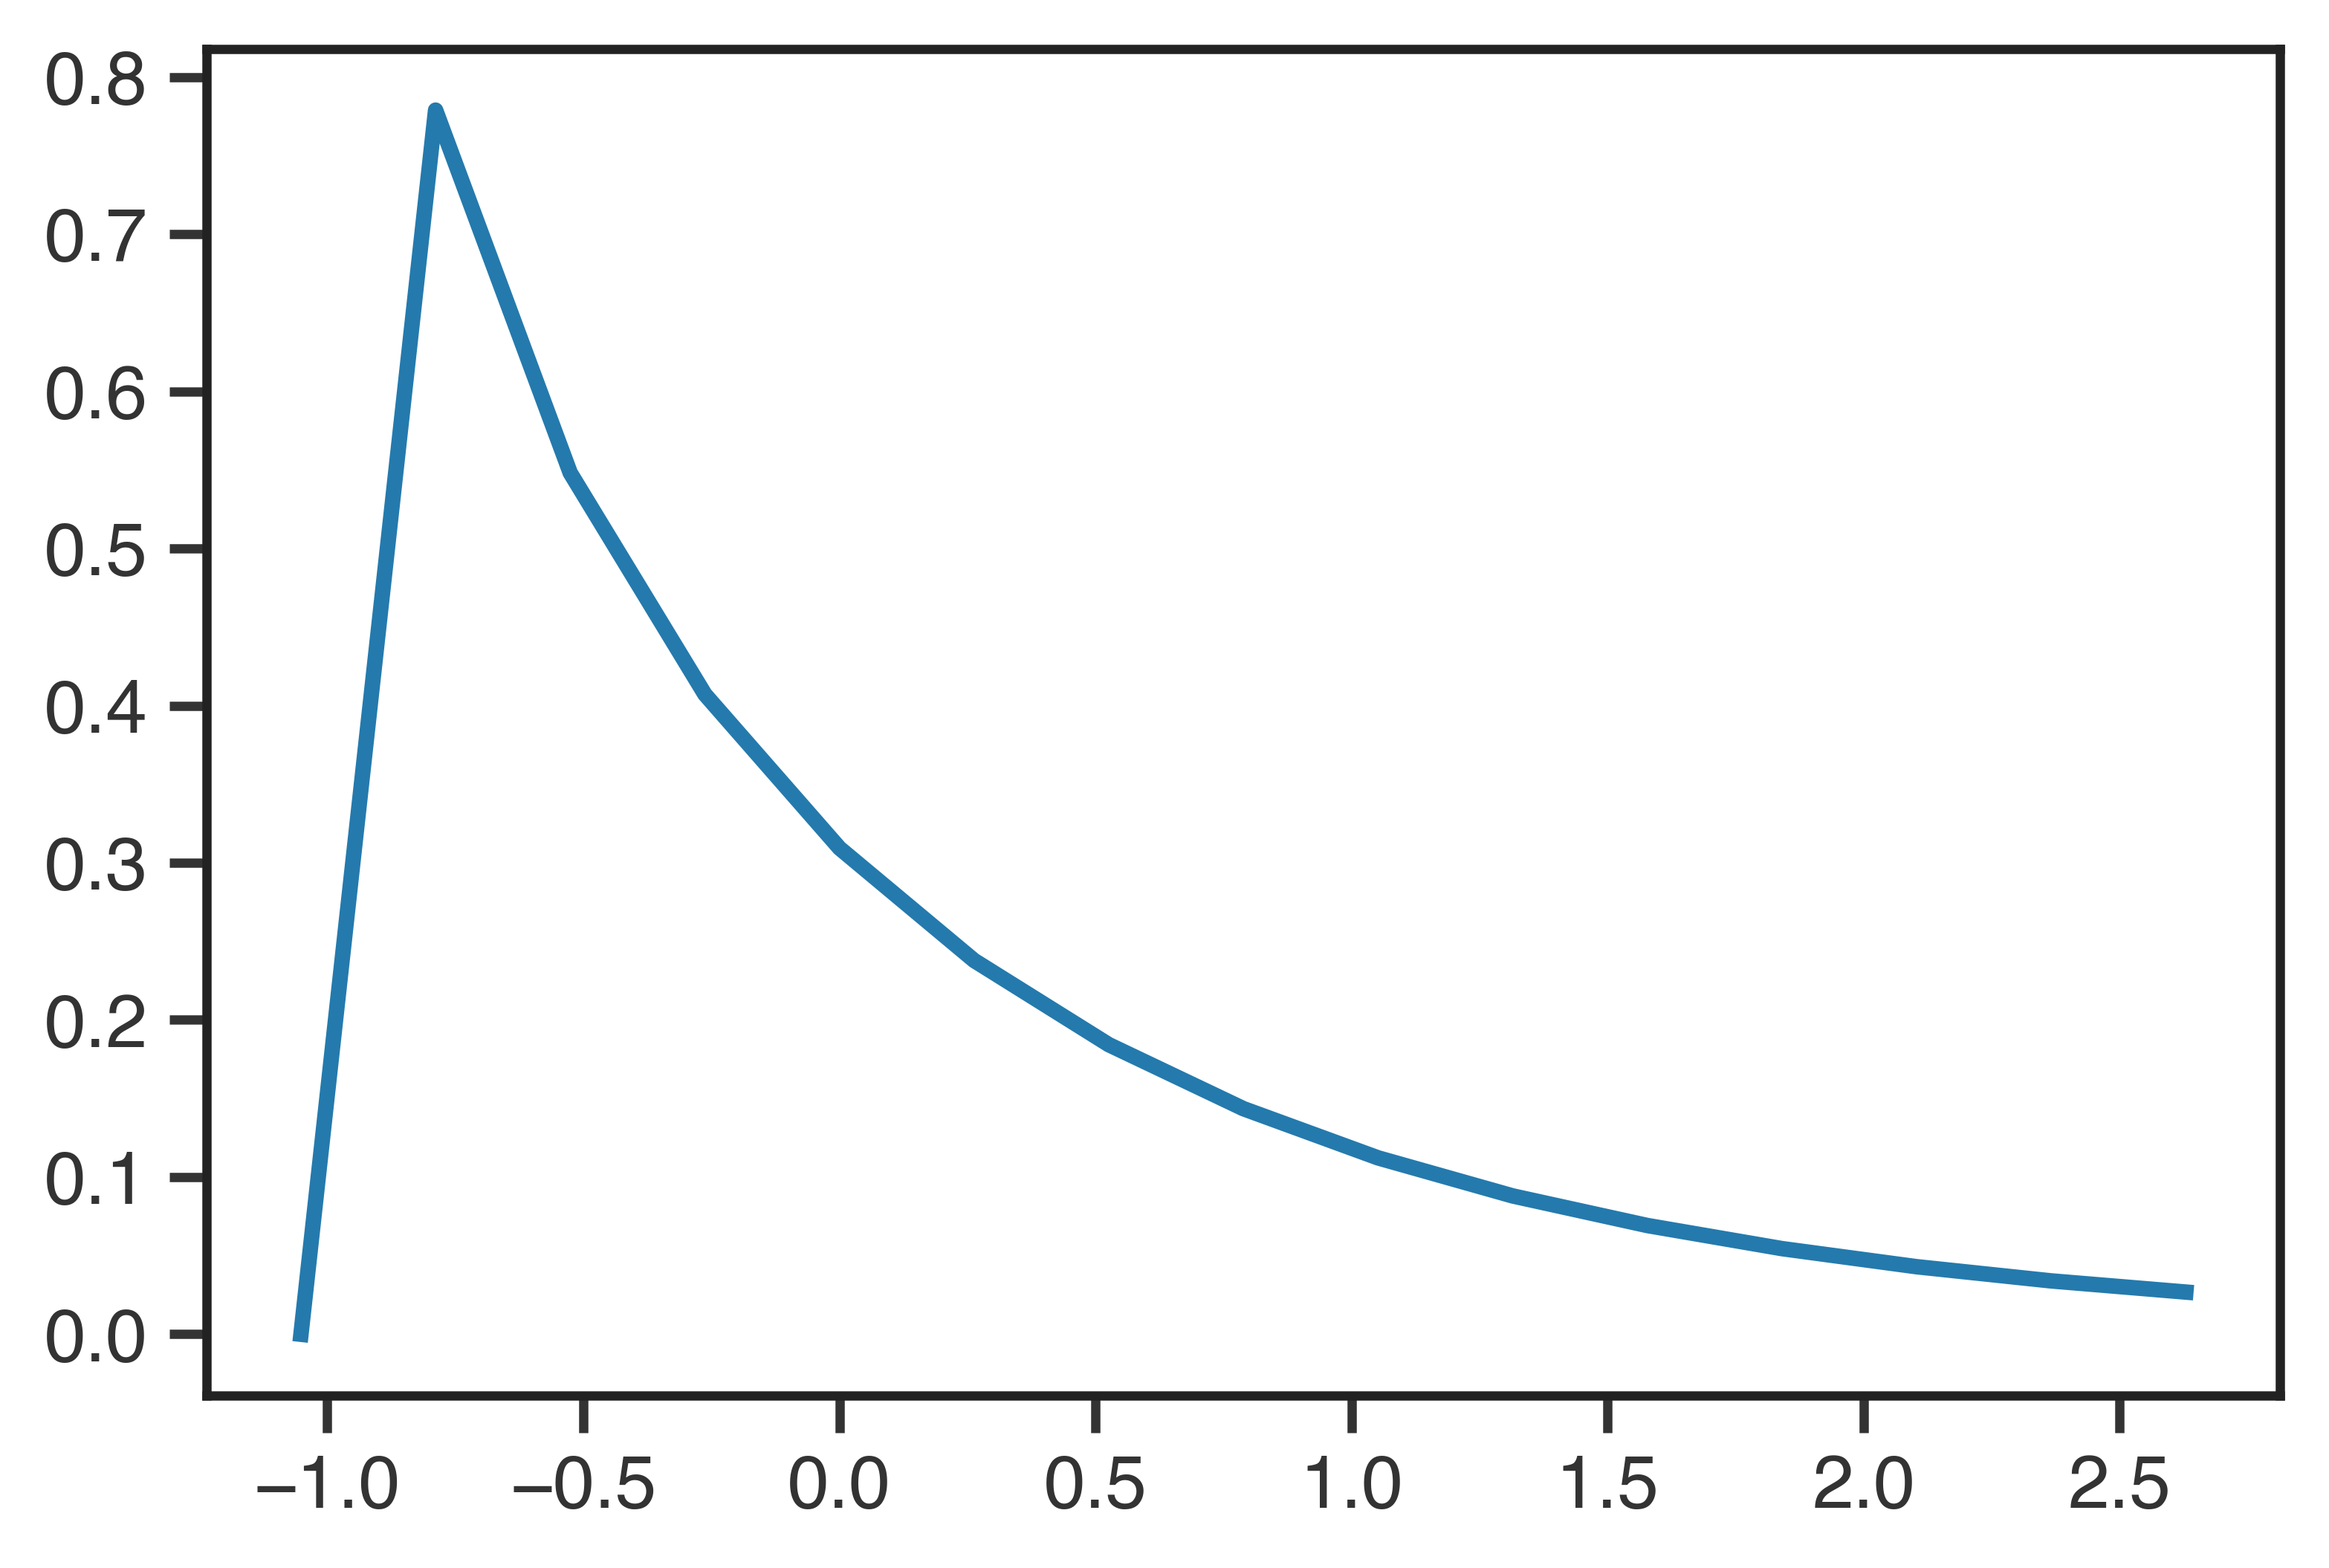

In [92]:
plt.plot(bins, actual_though)

In [75]:
this_fit

(0.81242607474028983, -1.0512828334165247, 1.1915191674101435)

In [72]:
ss.gamma.pdf(bins, this_fit[0], loc=this_fit[1], scale=this_fit[2])

array([  6.50827297e+02,   7.76763258e-01,   5.47024942e-01,
         4.06593874e-01,   3.08965092e-01,   2.37637762e-01,
         1.84181900e-01,   1.43507074e-01,   1.12248194e-01,
         8.80578982e-02,   6.92419412e-02,   5.45492619e-02,
         4.30412189e-02,   3.40054032e-02,   2.68964370e-02])

In [78]:
ss.gamma.pdf(this_var, this_fit[0], loc=this_fit[1], scale=this_fit[2])

array([  4.36060766e-01,   5.30166406e-01,   3.56994385e-01,
         3.22592643e-01,   6.49733205e-01,   3.62356718e-01,
         3.48026727e-02,   9.33703823e-01,   1.71985175e-01,
         6.50827297e+02,   8.08840374e-01,   2.68964370e-02,
         3.39994644e-01,   3.41722847e-01,   8.83839742e-01,
         4.56216592e-01,   1.45768325e-01,   1.65383890e-01,
         1.12809414e+00])

In [66]:
ss.gamma.pdf(bins, this_fit[0], loc=this_fit[1], scale=this_fit[2])

array([  6.50827297e+02,   7.76763258e-01,   5.47024942e-01,
         4.06593874e-01,   3.08965092e-01,   2.37637762e-01,
         1.84181900e-01,   1.43507074e-01,   1.12248194e-01,
         8.80578982e-02,   6.92419412e-02,   5.45492619e-02,
         4.30412189e-02,   3.40054032e-02,   2.68964370e-02])

In [68]:
ss.gamma.pdf(this_var, this_fit[0], loc=this_fit[1], scale=this_fit[2])

array([  4.36060766e-01,   5.30166406e-01,   3.56994385e-01,
         3.22592643e-01,   6.49733205e-01,   3.62356718e-01,
         3.48026727e-02,   9.33703823e-01,   1.71985175e-01,
         6.50827297e+02,   8.08840374e-01,   2.68964370e-02,
         3.39994644e-01,   3.41722847e-01,   8.83839742e-01,
         4.56216592e-01,   1.45768325e-01,   1.65383890e-01,
         1.12809414e+00])

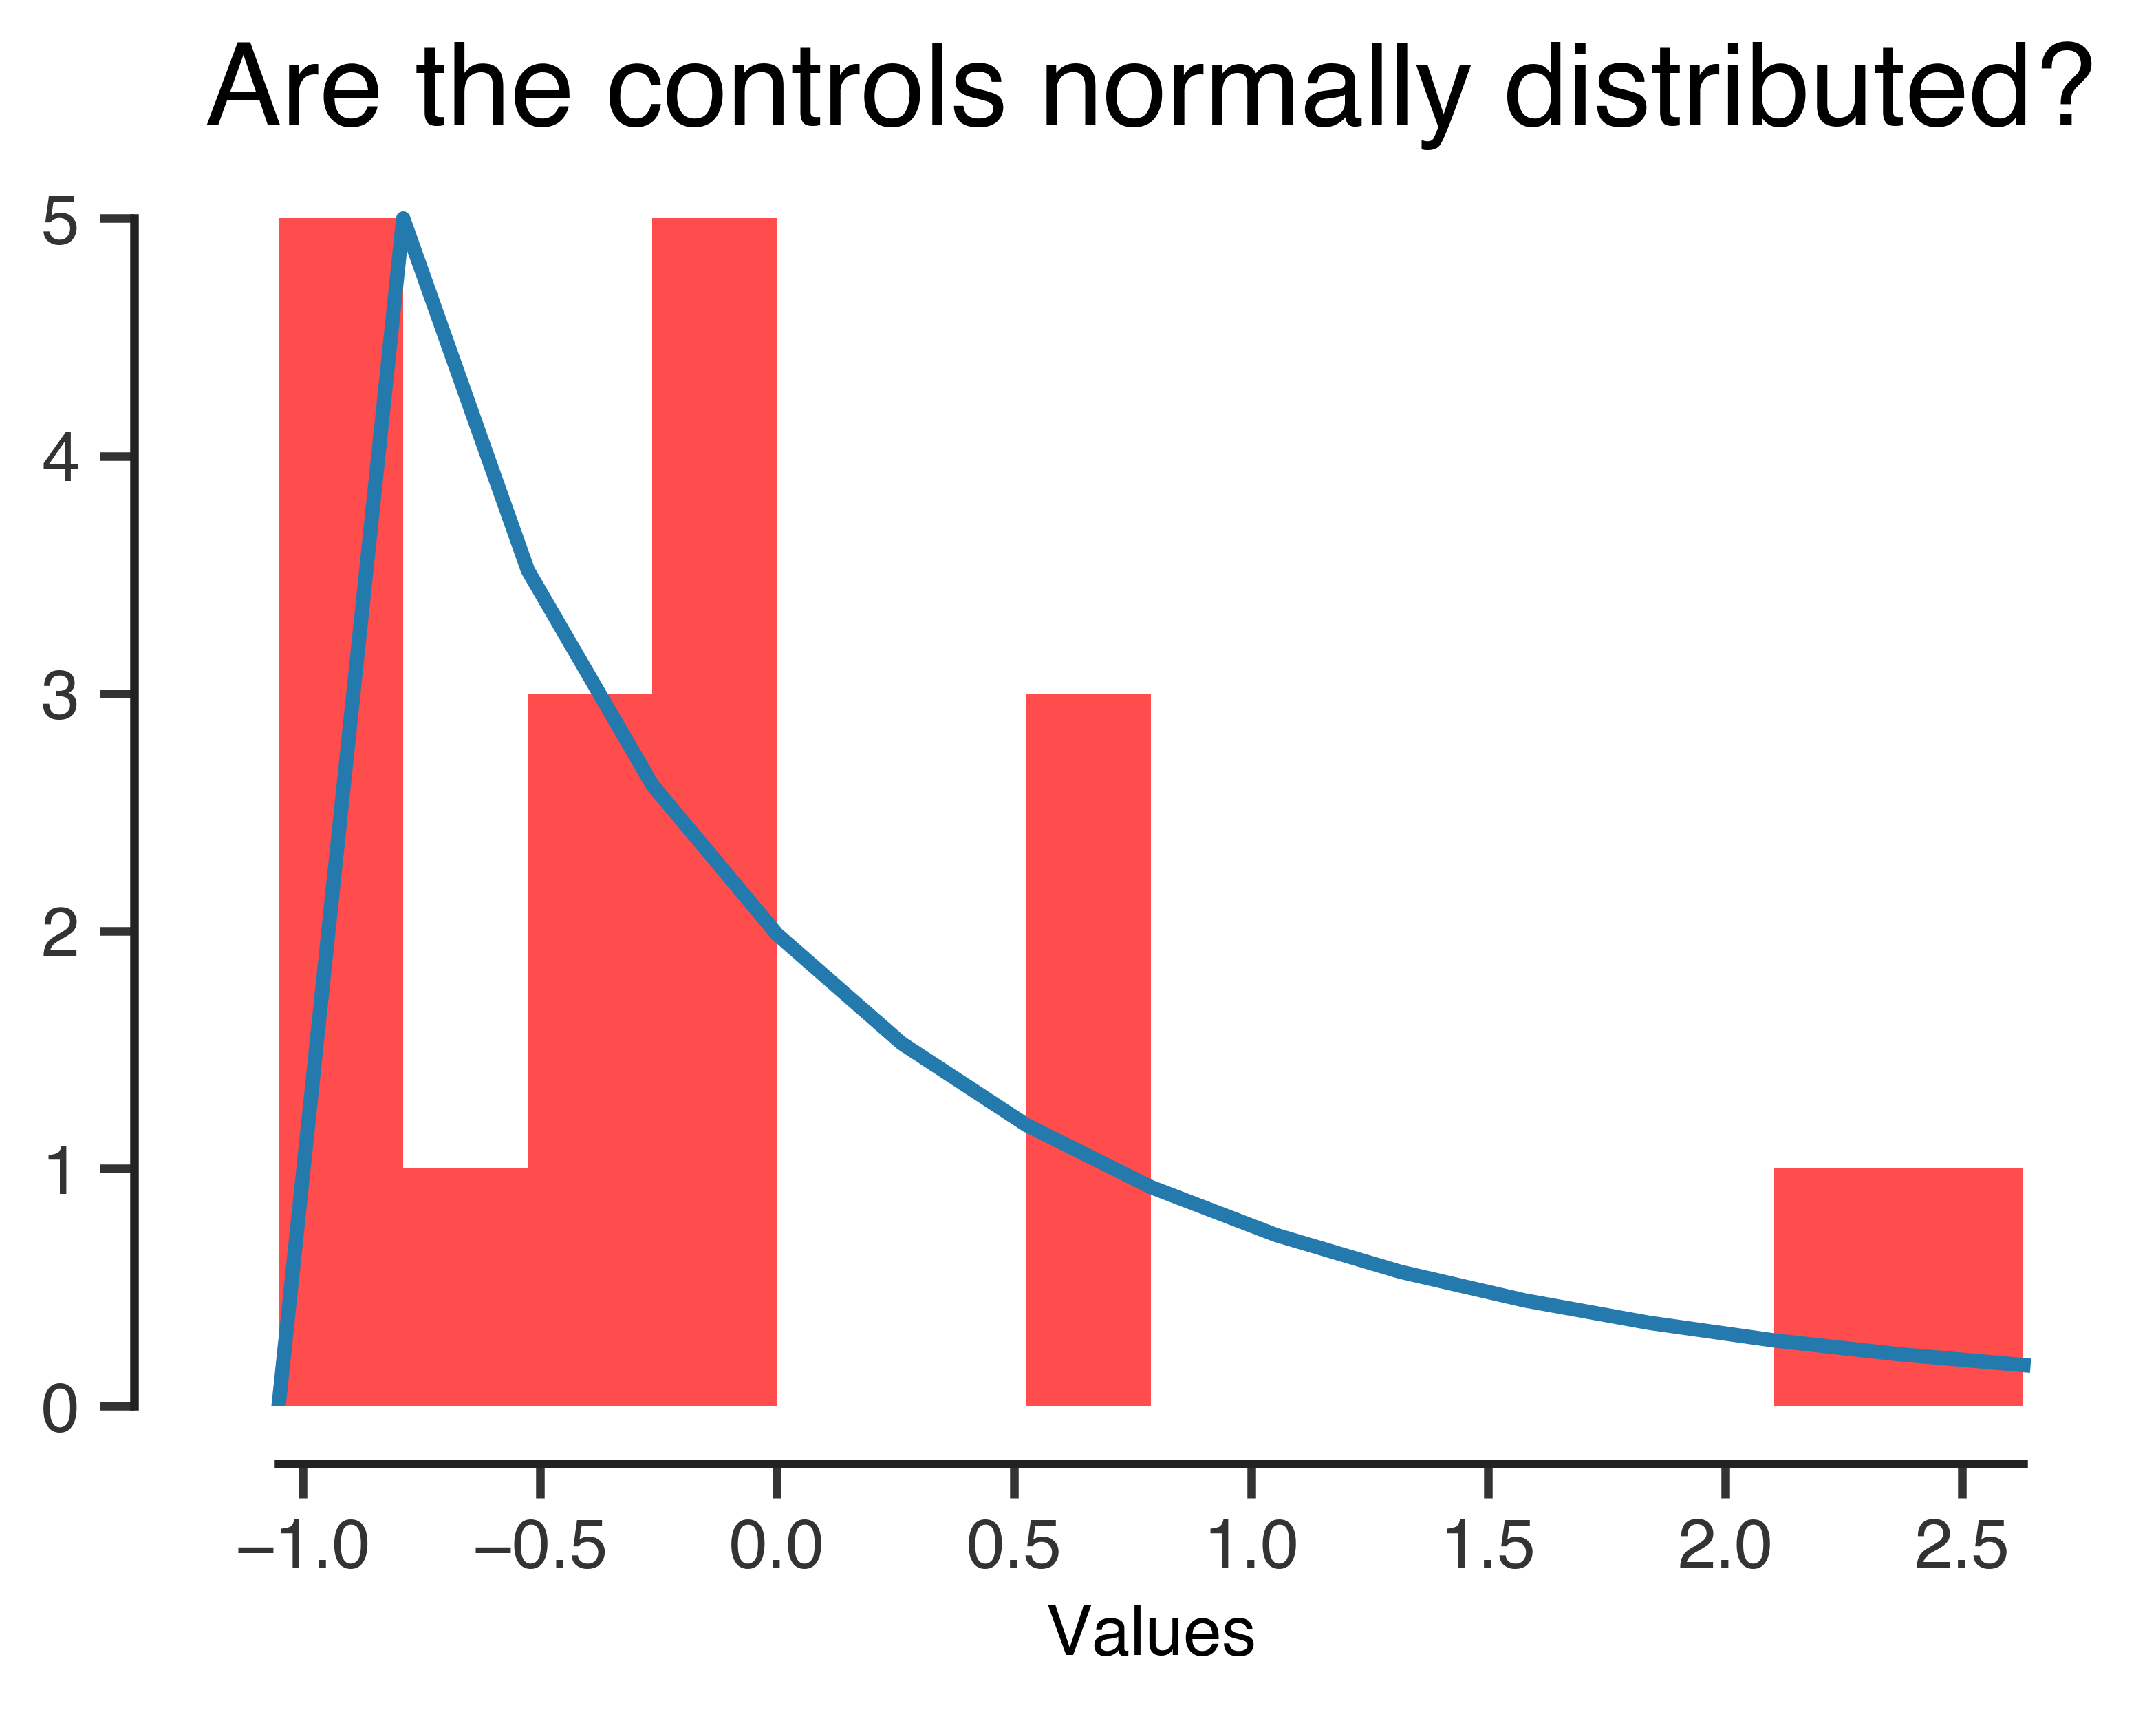

In [96]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]

# fit it!
this_fit = ss.gamma.fit(this_var)
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)
probs = ss.gamma.pdf(bins, this_fit[0], loc=this_fit[1], scale=this_fit[2])

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

# plt.plot(bins, probs, 'c')
plt.plot(bins, actual_though*np.max(count)/np.max(actual_though))

In [ ]:
log_likelihoods
for v in variables:
    